# Business Objective

There have been surge in people investing in stock from last few years and specially when people can invest from our their 
own smartphone, they have started understanding the importance of investment whether its stocks, real estate or metals.

Lots of people who do not know much about how stocks behave or at what time they should buy/sell a particular stock keeping 
the risk involved in mind, a Recommendation model can help them to choose the right stock.

A Model which can recommend users what to buy or what to sell in real time is our Business Objective.

# Constraints

1.Low Latency(In Real time within in few nano seconds the model should be able to classify the stocks according to the market )

2.Errors can be very costly, people can loose their money by one wrong prediction though the model can't be 100% accurate.

3.Interpretablity is important.

4.Probablity of a particular stock belonging to each class is needed.

# Machine Learning Formulation

This Recommendation model should classify a particular stock, whether its a "STRONG_BUY" "STRONG_SELL" "BUY" "SELL" "HOLD".

The major challenge of this classification problem is imabalance natures of class labels, most of times user has to HOLD the 
stocks and very few times STRONG BUY and STRONG SELL Signal is there.

# DATA

Scraped data for 64 US Companies from Yahoo Finance website, initially data has 41k rows and 67 features, 
Recommendation column has been added to data as the target class, This Recommendation column was calculated using 
domain knowledge of stock market(from some rule based system) and also from manual observation.

# PERFORMANCE METRIC

It is a simple multiclass classification problem, we can just use Multi-Class log loss for checking the performance.

Other than that we will use accuracy(after checking if data is balanced or not), here the important thing is we care 
equally about Precision and Recall because we care equall about False Positives and False Negatives.

EXAMPLE 1

Let's say we have a case when actually stock is "NOT A STRONG SELL" at that moment and model predicted it to be "STRONG SELL", 
here user will sell the stocks and after some time price of that stock rises and user won't be happy with the model and 
he/she might not use it afterwards. This is a case of False Positive.

EXAMPLE 2

let's say we have a case when actually stock is a "STRONG SELL" at the moment and model predicted it to be "NOT A STRONG SELL", 
Now in this case user can loose money because trend may change after some time and stocks price will decrease, 
User will definitely won't use the model. This is the case of False Negative.

So the best perfomance metric would be F1 score because F1 score is the harmonic mean between precision and recall and it 
will be high when both precision and recall will be high.

In [136]:
# importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/Study Material/ML_Project/Stock_Recommendation/csv_folder/new_data.csv")
data.head()

,Unnamed: 0,Open,High,Low,Date,Stock,Close,Change,Change%,Recommendation,...,MFI,MACD,Signal,Region,Exchange,Name,Sector,Industry,Marketcap,InstitutionalHolders
0,0,4.54,4.79,4.42,"Jul 19,2021",ENOB,4.77,0.20,4.38,NaN,...,38.94,-0.04,0.06,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
1,1,4.59,4.67,4.44,"Jul 16,2021",ENOB,4.57,0.01,0.22,NaN,...,33.14,-0.03,0.08,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
2,2,4.78,4.80,4.47,"Jul 15,2021",ENOB,4.56,-0.19,-4.00,NaN,...,23.22,0.00,0.11,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
3,3,4.68,4.90,4.59,"Jul 14,2021",ENOB,4.75,0.04,0.85,NaN,...,31.41,0.03,0.14,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
4,4,5.01,5.08,4.68,"Jul 13,2021",ENOB,4.71,-0.39,-7.65,NaN,...,29.68,0.06,0.17,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."


In [3]:
data.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Date', 'Stock', 'Close', 'Change',
       'Change%', 'Recommendation', 'MarketType', 'ADX', 'ADX_Strength', 'DI+',
       'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal', 'Region',
       'Exchange', 'Name', 'Sector', 'Industry', 'Marketcap',
       'InstitutionalHolders'],
      dtype='object')

In [4]:
data.shape

(41070, 27)

# Checking for Missing Data

In [5]:
data.isna().sum()

Unnamed: 0                  0
Open                        0
High                        0
Low                         0
Date                        0
Stock                       0
Close                       0
Change                      9
Change%                     9
Recommendation          32461
MarketType                 16
ADX                        16
ADX_Strength              440
DI+                         0
DI-                         0
William%R                 105
RSI                         0
MFI                       105
MACD                        0
Signal                      0
Region                   3052
Exchange                 3052
Name                     3052
Sector                   3052
Industry                 3052
Marketcap                3052
InstitutionalHolders     3052
dtype: int64

# Handling the Missing Data

In [6]:
data["Recommendation"] = data["Recommendation"].fillna("Hold")
data.isna().sum()

Unnamed: 0                 0
Open                       0
High                       0
Low                        0
Date                       0
Stock                      0
Close                      0
Change                     9
Change%                    9
Recommendation             0
MarketType                16
ADX                       16
ADX_Strength             440
DI+                        0
DI-                        0
William%R                105
RSI                        0
MFI                      105
MACD                       0
Signal                     0
Region                  3052
Exchange                3052
Name                    3052
Sector                  3052
Industry                3052
Marketcap               3052
InstitutionalHolders    3052
dtype: int64

In [7]:
data.dropna(inplace=True)
data.isna().sum()

Unnamed: 0              0
Open                    0
High                    0
Low                     0
Date                    0
Stock                   0
Close                   0
Change                  0
Change%                 0
Recommendation          0
MarketType              0
ADX                     0
ADX_Strength            0
DI+                     0
DI-                     0
William%R               0
RSI                     0
MFI                     0
MACD                    0
Signal                  0
Region                  0
Exchange                0
Name                    0
Sector                  0
Industry                0
Marketcap               0
InstitutionalHolders    0
dtype: int64

In [8]:
data["Recommendation"].value_counts()

Hold           29773
Sell            3372
Buy             2220
Strong Sell     1285
Strong Buy      1011
Name: Recommendation, dtype: int64

In [9]:
df_Categorical = data.select_dtypes(include=['object'])
df_Categorical.head()

,Date,Stock,Recommendation,MarketType,ADX_Strength,Region,Exchange,Name,Sector,Industry,Marketcap,InstitutionalHolders
0,"Jul 19,2021",ENOB,Hold,UpTrend,13days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
1,"Jul 16,2021",ENOB,Hold,UpTrend,12days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
2,"Jul 15,2021",ENOB,Hold,UpTrend,11days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
3,"Jul 14,2021",ENOB,Hold,UpTrend,10days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
4,"Jul 13,2021",ENOB,Hold,UpTrend,9days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."


In [10]:
df_Categorical.columns

Index(['Date', 'Stock', 'Recommendation', 'MarketType', 'ADX_Strength',
       'Region', 'Exchange', 'Name', 'Sector', 'Industry', 'Marketcap',
       'InstitutionalHolders'],
      dtype='object')

In [11]:
df_Numerical = data.select_dtypes(include=['int','float'])
df_Numerical['Recommendation'] = data['Recommendation']
df_Numerical.head()

,Unnamed: 0,Open,High,Low,Close,Change,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal,Recommendation
0,0,4.54,4.79,4.42,4.77,0.20,4.38,47.12,34.02,16.34,-70.09,47.82,38.94,-0.04,0.06,Hold
1,1,4.59,4.67,4.44,4.57,0.01,0.22,48.05,34.11,17.27,-88.70,43.87,33.14,-0.03,0.08,Hold
2,2,4.78,4.80,4.47,4.56,-0.19,-4.00,49.22,35.27,17.42,-93.08,43.67,23.22,0.00,0.11,Hold
3,3,4.68,4.90,4.59,4.75,0.04,0.85,50.40,36.95,16.52,-82.40,46.57,31.41,0.03,0.14,Hold
4,4,5.01,5.08,4.68,4.71,-0.39,-7.65,51.34,38.55,15.97,-85.60,45.87,29.68,0.06,0.17,Hold


In [12]:
df_Numerical.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Change', 'Change%',
       'ADX', 'DI+', 'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal',
       'Recommendation'],
      dtype='object')

# EDA(Exploratory Data Analysis)

# Uni-Variate Analysis

# Numerical Data

# Open

(array([3.6082e+04, 7.1800e+02, 2.4100e+02, 1.1200e+02, 1.2700e+02,
        6.3000e+01, 4.3000e+01, 1.8000e+01, 2.1100e+02, 4.6000e+01]),
 array([2.00000e-01, 3.74580e+02, 7.48960e+02, 1.12334e+03, 1.49772e+03,
        1.87210e+03, 2.24648e+03, 2.62086e+03, 2.99524e+03, 3.36962e+03,
        3.74400e+03]),
 <BarContainer object of 10 artists>)

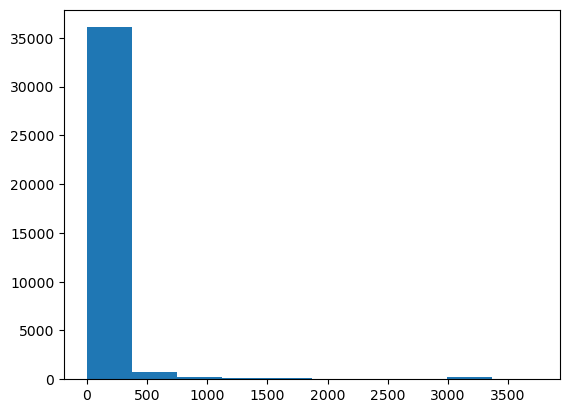

In [13]:
plt.hist(df_Numerical['Open'])
# histogram gives frequency over internval. And col should always be numerical.

# Observations
Here we can see that maximum stocks opens between 0 to 480. And very few stocks have opened at amount more than 500.

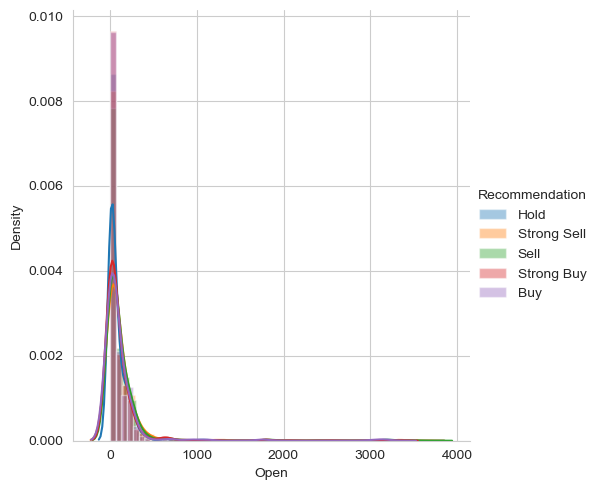

In [14]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height=5).map(sns.distplot, 'Open').add_legend()
plt.show()

# Observations
PDF of Open is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

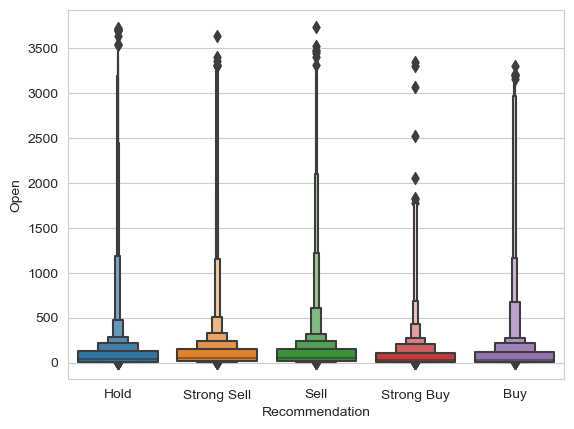

In [15]:
# now plotting the box plot
sns.boxenplot(x = "Recommendation", y = "Open", data = df_Numerical)
plt.show()

# Observations
Here boxplot is not helping in analysing data.

# Close

(array([3.6071e+04, 7.3300e+02, 2.3000e+02, 1.1600e+02, 1.2600e+02,
        6.6000e+01, 4.3000e+01, 1.9000e+01, 2.0800e+02, 4.9000e+01]),
 array([2.000000e-01, 3.733210e+02, 7.464420e+02, 1.119563e+03,
        1.492684e+03, 1.865805e+03, 2.238926e+03, 2.612047e+03,
        2.985168e+03, 3.358289e+03, 3.731410e+03]),
 <BarContainer object of 10 artists>)

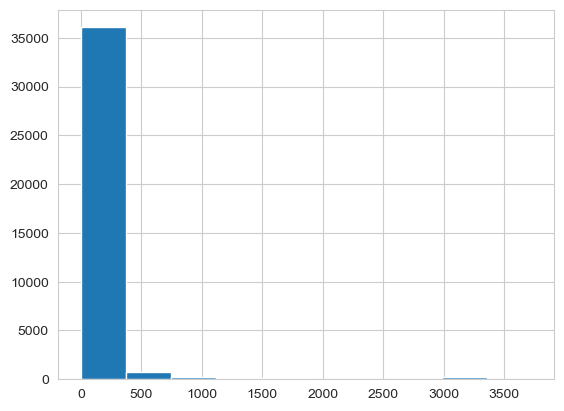

In [16]:
plt.hist(df_Numerical["Close"])

# Observations
Here we can see that maximum stocks closing price is between 0 to 480, and very few stocks have closing price above 500.

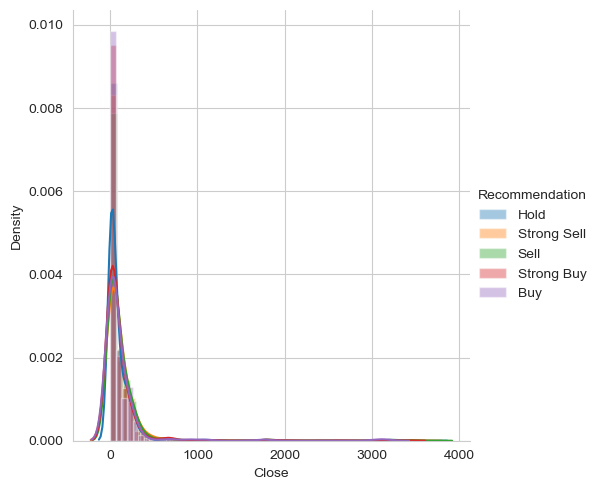

In [17]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "Close").add_legend()
plt.show()

# Observations
PDF of Close is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='Close'>

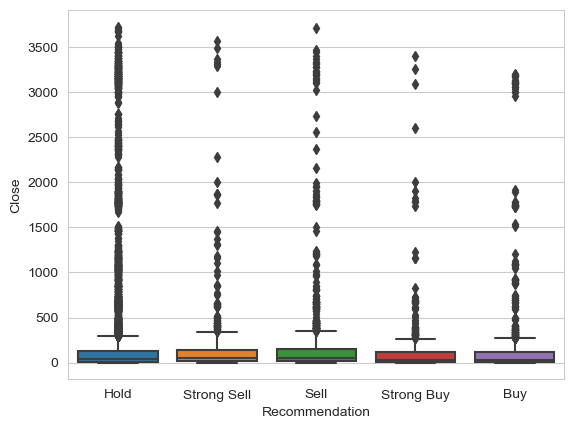

In [18]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "Close", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data.

# High

(array([3.6055e+04, 7.3900e+02, 2.3200e+02, 1.2100e+02, 1.2900e+02,
        6.6000e+01, 4.3000e+01, 1.6000e+01, 2.1200e+02, 4.8000e+01]),
 array([2.000000e-01, 3.774880e+02, 7.547760e+02, 1.132064e+03,
        1.509352e+03, 1.886640e+03, 2.263928e+03, 2.641216e+03,
        3.018504e+03, 3.395792e+03, 3.773080e+03]),
 <BarContainer object of 10 artists>)

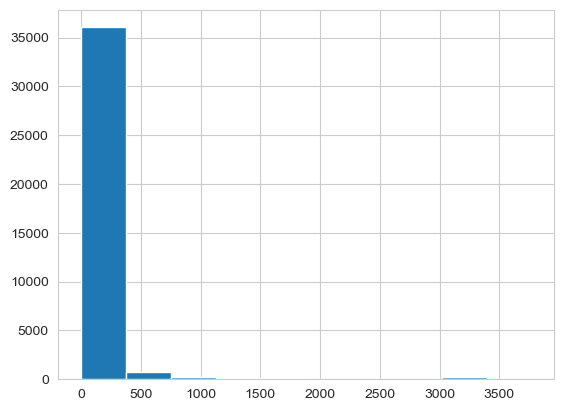

In [19]:
plt.hist(df_Numerical["High"])

# Observations
Here maximum stocks with high price is within the 400.

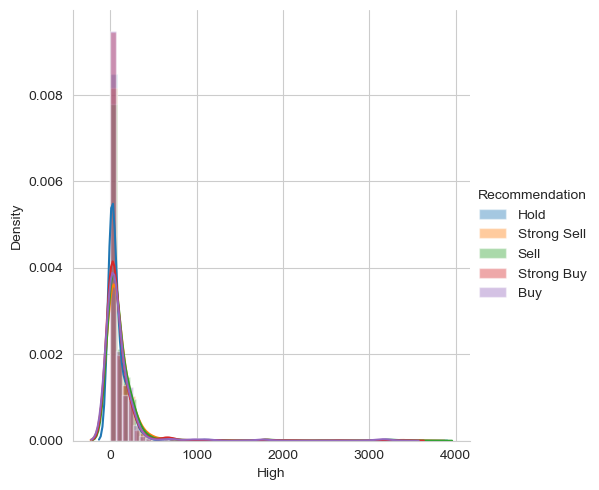

In [20]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "High").add_legend()
plt.show()

# Observations
PDF of High is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='High'>

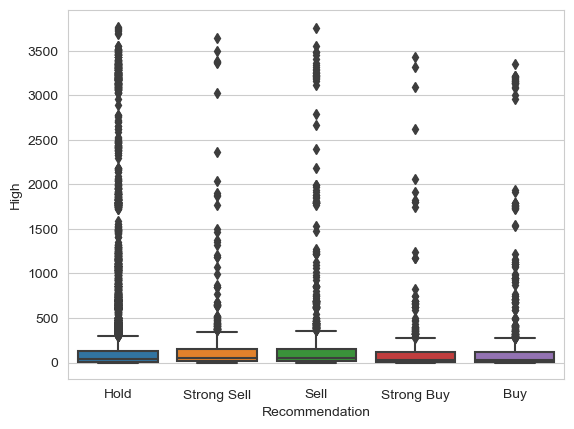

In [21]:
# now box plot
sns.boxplot(x = "Recommendation", y = "High", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data.

# Low

(array([3.6101e+04, 7.1100e+02, 2.3800e+02, 1.0500e+02, 1.2300e+02,
        6.5000e+01, 4.3000e+01, 2.4000e+01, 2.0400e+02, 4.7000e+01]),
 array([1.700000e-01, 3.698320e+02, 7.394940e+02, 1.109156e+03,
        1.478818e+03, 1.848480e+03, 2.218142e+03, 2.587804e+03,
        2.957466e+03, 3.327128e+03, 3.696790e+03]),
 <BarContainer object of 10 artists>)

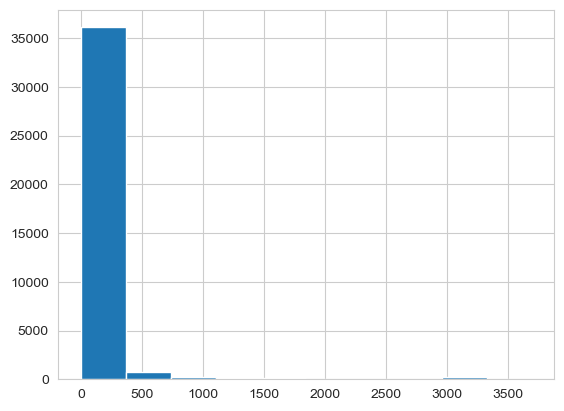

In [22]:
plt.hist(df_Numerical["Low"])

# Observations
Here the maximum stocks with lowest price is between 0 to 400

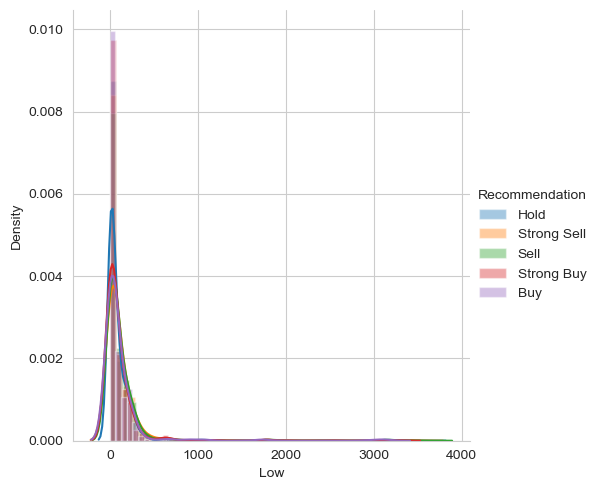

In [23]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "Low").add_legend()
plt.show()

# Observations
PDF of Low is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='Low'>

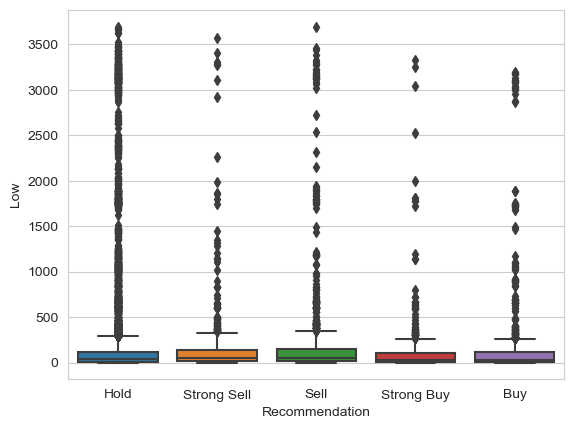

In [24]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "Low", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data

# ADX (Average Directional Index)

(array([ 2889., 10872.,  9593.,  6685.,  3946.,  2155.,  1054.,   322.,
          109.,    36.]),
 array([ 6.52 , 13.212, 19.904, 26.596, 33.288, 39.98 , 46.672, 53.364,
        60.056, 66.748, 73.44 ]),
 <BarContainer object of 10 artists>)

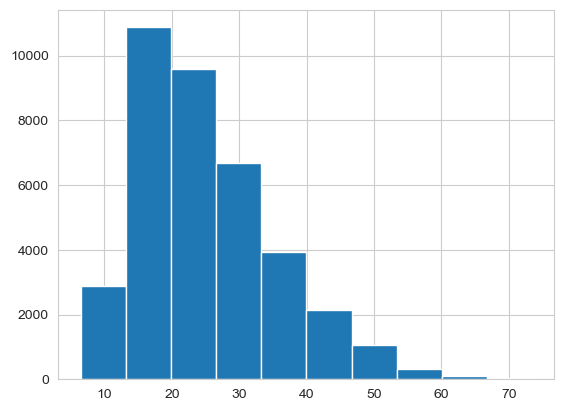

In [25]:
plt.hist(df_Numerical["ADX"])

# Observation
Here the majority of stocks have ADX value between 12 to 20, Later on the as the ADX value increases the number of stocks
decreases. The curve is somewhat similar to right skewed 

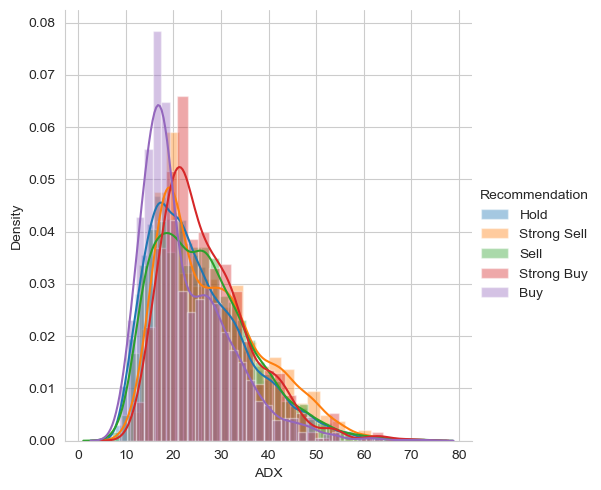

In [26]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "ADX").add_legend()
plt.show()

# Observations
PDF of Low is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='ADX'>

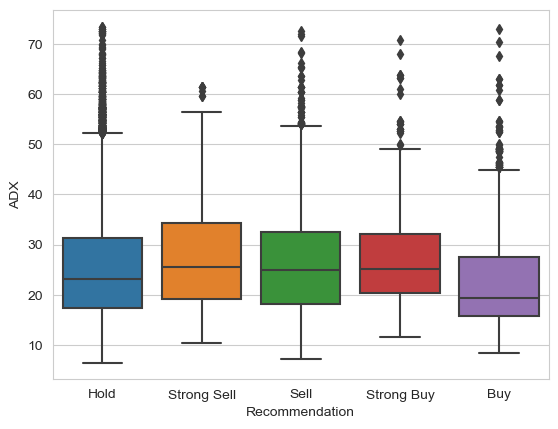

In [27]:
# box plot
sns.boxplot(x = "Recommendation", y = "ADX", data = df_Numerical)

# Observation
Here boxplot is not helping in analysing data.

# DI+ (Directional Movement Index Positive)

(array([9.1500e+02, 9.6080e+03, 1.5364e+04, 8.7580e+03, 2.3060e+03,
        5.7000e+02, 8.9000e+01, 3.9000e+01, 1.0000e+01, 2.0000e+00]),
 array([ 1.83 , 10.978, 20.126, 29.274, 38.422, 47.57 , 56.718, 65.866,
        75.014, 84.162, 93.31 ]),
 <BarContainer object of 10 artists>)

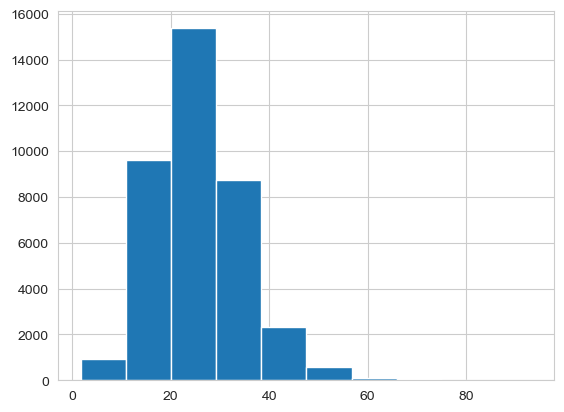

In [28]:
plt.hist(df_Numerical["DI+"])

# Observation
Here the majority of stock with DI+ value are between 20 to 30. And graph is little right skewed. 

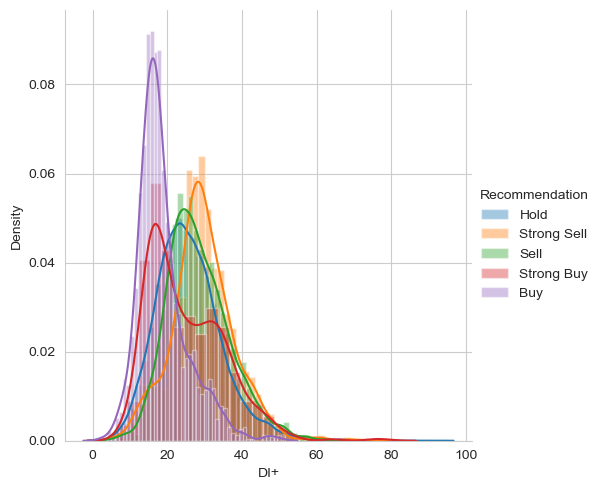

In [29]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "DI+").add_legend()
plt.show()

# Observations
Here we can see that if any stock has DI+ value between 10 to 20, then those stocks should be buyed. And if the DI+ value is between 30 to 35 then those stocks are to be sold or strongly sold

<Axes: xlabel='Recommendation', ylabel='DI+'>

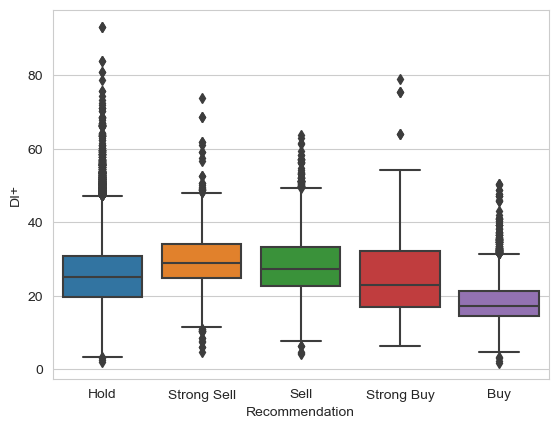

In [30]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "DI+", data = df_Numerical)

# Observations
Here we can see that if any stock has DI+ value between 10 to 20, then those stocks should be buyed. And if the DI+ value is between 30 to 35 then those stocks are to be sold or strongly sold

# DI- (Directional Movement Index Negative)

(array([  543.,  4628., 10496., 11234.,  6812.,  2846.,   839.,   187.,
           59.,    17.]),
 array([ 1.3  ,  7.325, 13.35 , 19.375, 25.4  , 31.425, 37.45 , 43.475,
        49.5  , 55.525, 61.55 ]),
 <BarContainer object of 10 artists>)

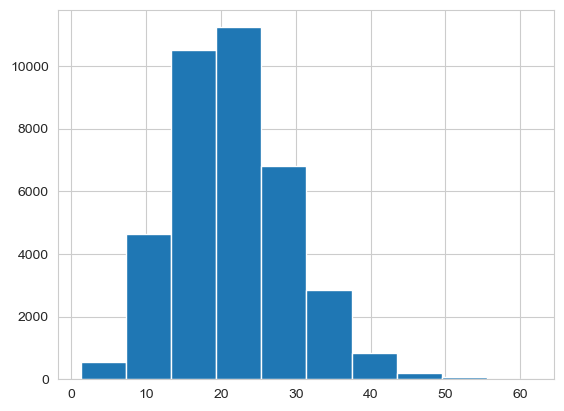

In [31]:
plt.hist(df_Numerical["DI-"])

# Observations
Here the majority of stock with DI- value are between 15 to 25. And graph is little right skewed.

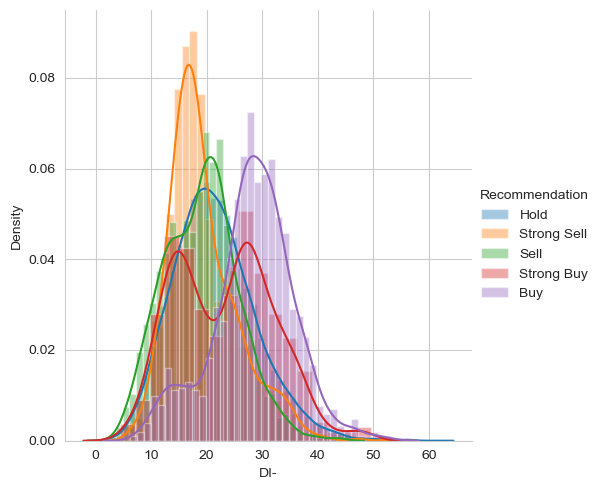

In [32]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "DI-").add_legend()
plt.show()

# Observation
Here if the DI- value is between 12 to 15 then it recommends strong sell and when the DI- value is between 30 to 35 it recommends buy those stocks.

<Axes: xlabel='Recommendation', ylabel='DI-'>

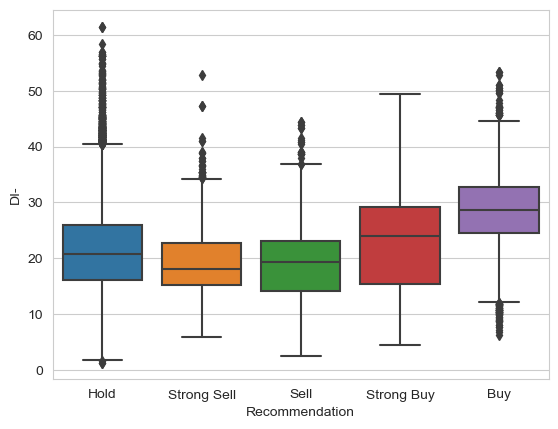

In [33]:
# now box plot
sns.boxplot(x = "Recommendation", y = "DI-", data = df_Numerical)

# Observation
Here if the DI- value is between 12 to 15 then it recommends strong sell and when the DI- value is between 30 to 35 it recommends buy those stocks.

# Williams%R (Williams Percent Range)

(array([3548., 3619., 3525., 3210., 3250., 3386., 3543., 4035., 4715.,
        4830.]),
 array([-100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,
         -10.,    0.]),
 <BarContainer object of 10 artists>)

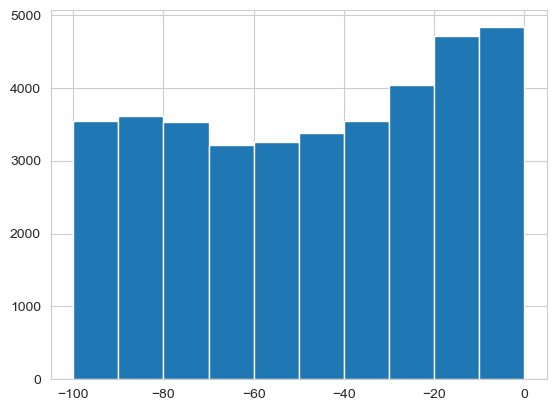

In [34]:
plt.hist(df_Numerical["William%R"])

# Observation
Here we can see that maximum stocks William%R lies between the range of -20 to 0.

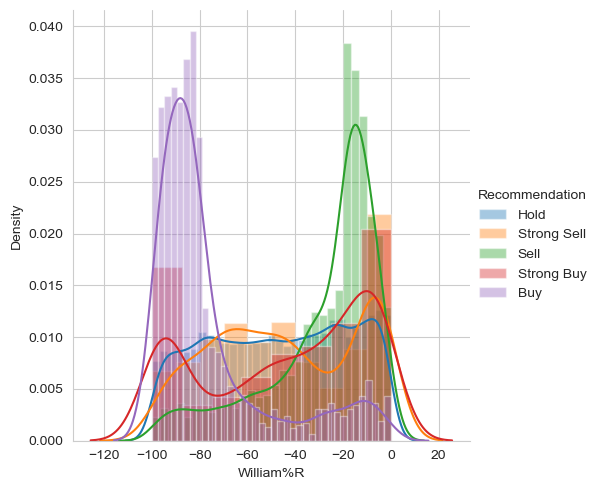

In [35]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "William%R").add_legend()
plt.show()

# Observations
Here we can see that when the value of William%R is less than -70 it recommends to buy those stocks, and when the value of William%R is between -20 to -10 it recommends to sell the stocks.

<Axes: xlabel='Recommendation', ylabel='William%R'>

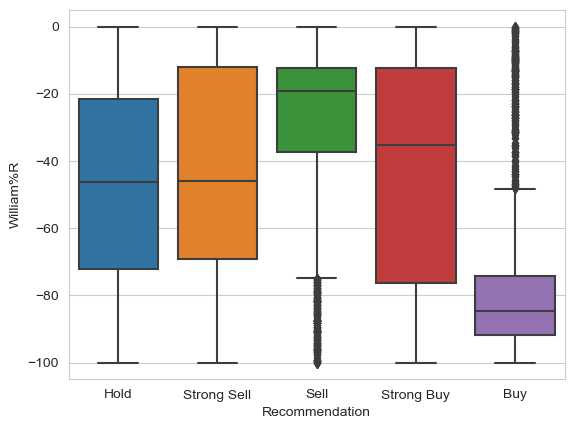

In [36]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "William%R", data = df_Numerical)

# Observations
Here we can see that when the value of William%R is less than -70 it recommends to buy those stocks, and when the value of William%R is between -20 to -10 it recommends to sell the stocks, but it also overlaps with strong buy.

# RSI (Relative Strength Index)

(array([   75.,   489.,  2301.,  6033., 10060.,  9579.,  6137.,  2374.,
          566.,    47.]),
 array([ 8.15 , 17.079, 26.008, 34.937, 43.866, 52.795, 61.724, 70.653,
        79.582, 88.511, 97.44 ]),
 <BarContainer object of 10 artists>)

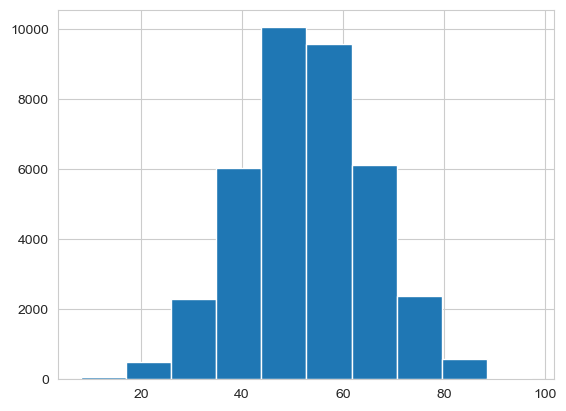

In [37]:
plt.hist(df_Numerical["RSI"])

# Observations
Here the plot looks like normal distribution. And we can tell by looking at the plot, that majority of stocks are between RSI value of 45 to 60

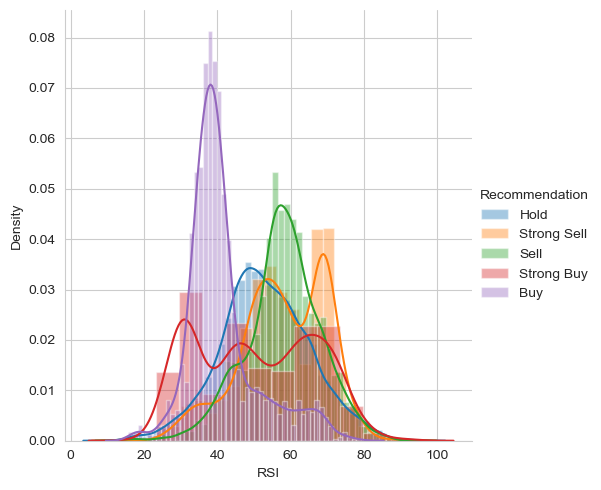

In [38]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "RSI").add_legend()
plt.show()

# Observations
Here if the RSI value is less than 45 then it shows buying of stocks, and if the RSI value is above 70 then it shows strong sell of the stocks and when RSI value is between 55 to 60 it shows stocks are being sold

<Axes: xlabel='Recommendation', ylabel='RSI'>

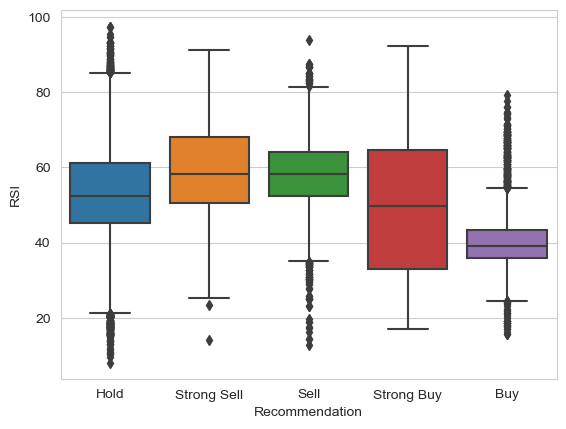

In [39]:
# now box plot
sns.boxplot(x = "Recommendation", y = "RSI", data = df_Numerical)

# Observations
Here if the RSI value is less than 45 then it shows buying of stocks, and if the RSI value is above 65 then it shows sell the stocks and when RSI value is between 55 to 60 it shows overlapping of strong buy, sell and strong sell.

# MFI (Money Flow Index)

(array([ 127.,  733., 2414., 4353., 6799., 7909., 7654., 5218., 2071.,
         383.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

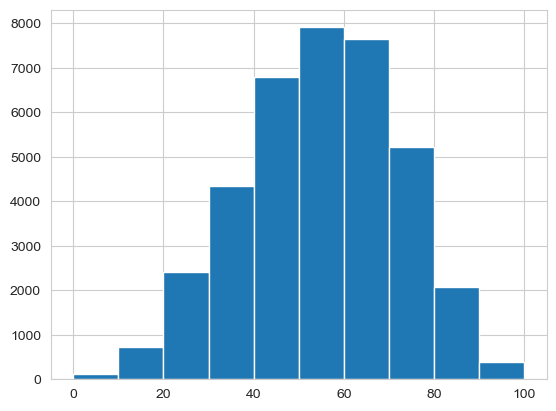

In [40]:
plt.hist(df_Numerical["MFI"])

# Observations
Here we can see that maximum stocks have MFI value between 50 to 60, followed by the stock's MFI value between 60 to 70  

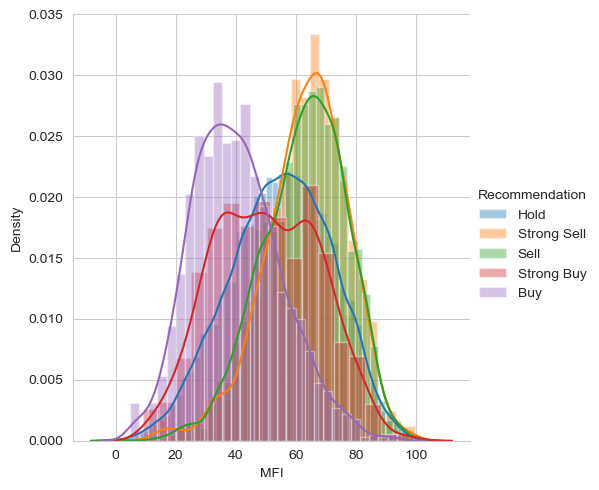

In [41]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "MFI").add_legend()
plt.show()

# Observations
Here when the MFI Value is between 30 to 40 it shows Buying of Stocks, and when the value is between 60 to 70 there is overlapping of Sell and Strong Sell

<Axes: xlabel='Recommendation', ylabel='RSI'>

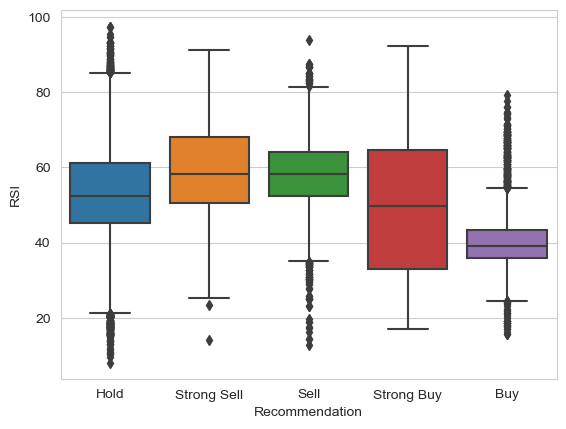

In [42]:
# now box plot
sns.boxplot(x = "Recommendation", y = "RSI", data = df_Numerical)

# Observations
Here we can see that if the MFI Value is less than 45 then it shows Strong Buy and Buy of Stocks. If the MFI Value is above 65 then shows Strong Sell of Stocks. When the MFI Value is between 50 to 65 there is overlapping of Strong Sell, Sell and Strong Buy of stocks.

# MACD(Moving Average Convergence Divergence)

(array([2.2000e+01, 1.5400e+02, 6.0930e+03, 3.0784e+04, 3.0500e+02,
        1.8500e+02, 7.7000e+01, 2.1000e+01, 1.5000e+01, 5.0000e+00]),
 array([-70.86 , -47.505, -24.15 ,  -0.795,  22.56 ,  45.915,  69.27 ,
         92.625, 115.98 , 139.335, 162.69 ]),
 <BarContainer object of 10 artists>)

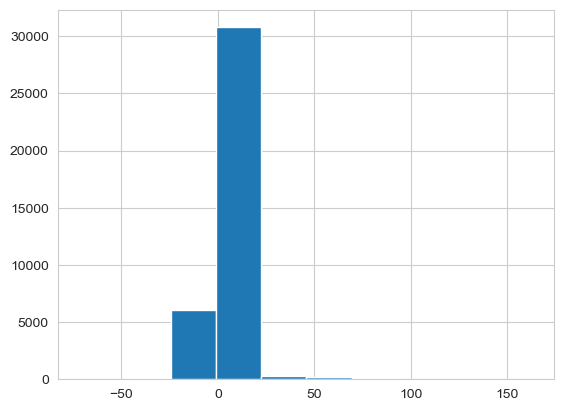

In [43]:
plt.hist(df_Numerical["MACD"])

# Observations
Here we can see that majority of stocks have MACD value ranging between 0 to 20.

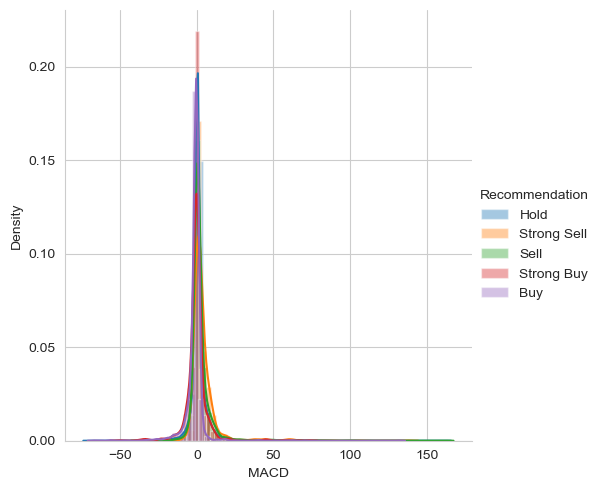

In [44]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "MACD").add_legend()
plt.show()

# Observations
PDF of Low is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='MACD'>

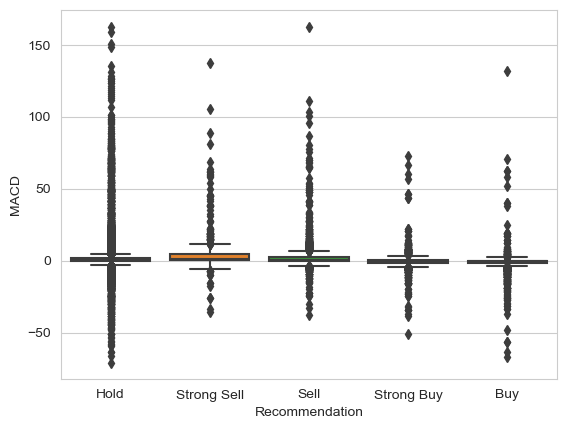

In [45]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "MACD", data = df_Numerical)

# Observation
Here boxplot is not helping in analysing data.

# Signal

(array([6.2000e+01, 3.0200e+02, 3.3635e+04, 3.1270e+03, 2.3900e+02,
        1.5400e+02, 8.6000e+01, 3.2000e+01, 1.3000e+01, 1.1000e+01]),
 array([-51.6  , -32.515, -13.43 ,   5.655,  24.74 ,  43.825,  62.91 ,
         81.995, 101.08 , 120.165, 139.25 ]),
 <BarContainer object of 10 artists>)

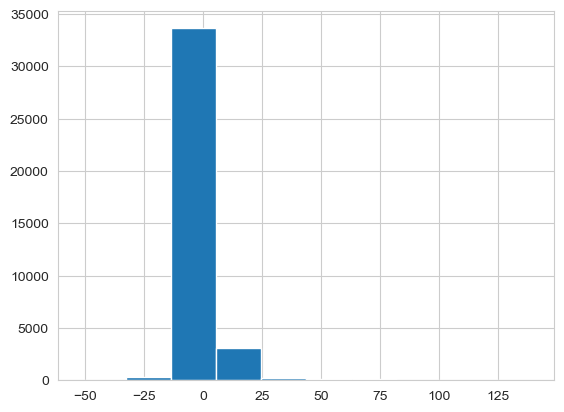

In [46]:
plt.hist(df_Numerical["Signal"])

# Observations
Here we can see that maximum stocks have the Signal values ranging between -20 to 0.

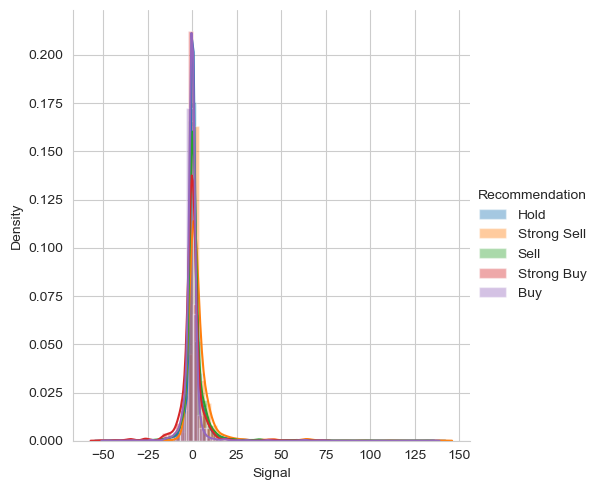

In [47]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Recommendation", height = 5).map(sns.distplot, "Signal").add_legend()
plt.show()

# Observations
PDF of Low is not helpful to differentiate between Hold, Strong Sell, Sell, Strong Buy, Buy.

<Axes: xlabel='Recommendation', ylabel='Signal'>

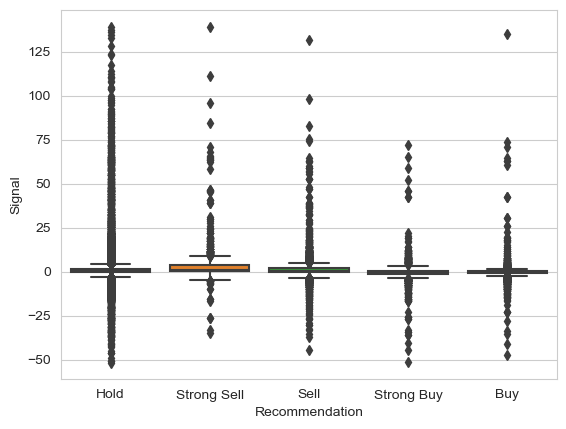

In [48]:
# now boxplot
sns.boxplot(x = "Recommendation", y = "Signal", data = df_Numerical)

# Observation
Here boxplot is not helping in analysing data.

# Bi-Variate Analysis

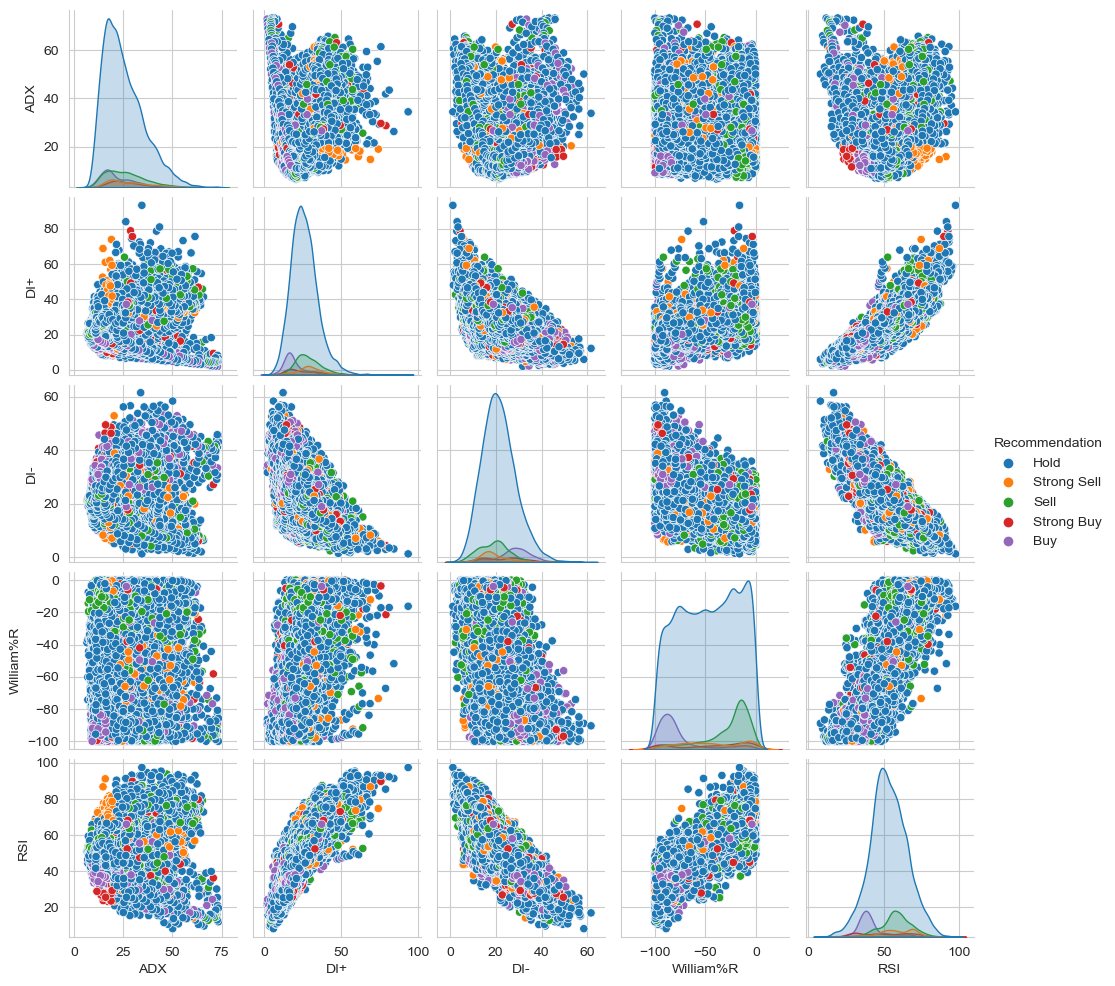

In [49]:
# plotting the pair plot
# Here we only took the columns for plotting the pairplot which showed a pattern during the univariate analysis
temp_Numerical = df_Numerical[['ADX', 'DI+', 'DI-', 'William%R','RSI','Recommendation']] 
sns.set_style("whitegrid")
sns.pairplot(temp_Numerical, hue = "Recommendation", height = 2)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

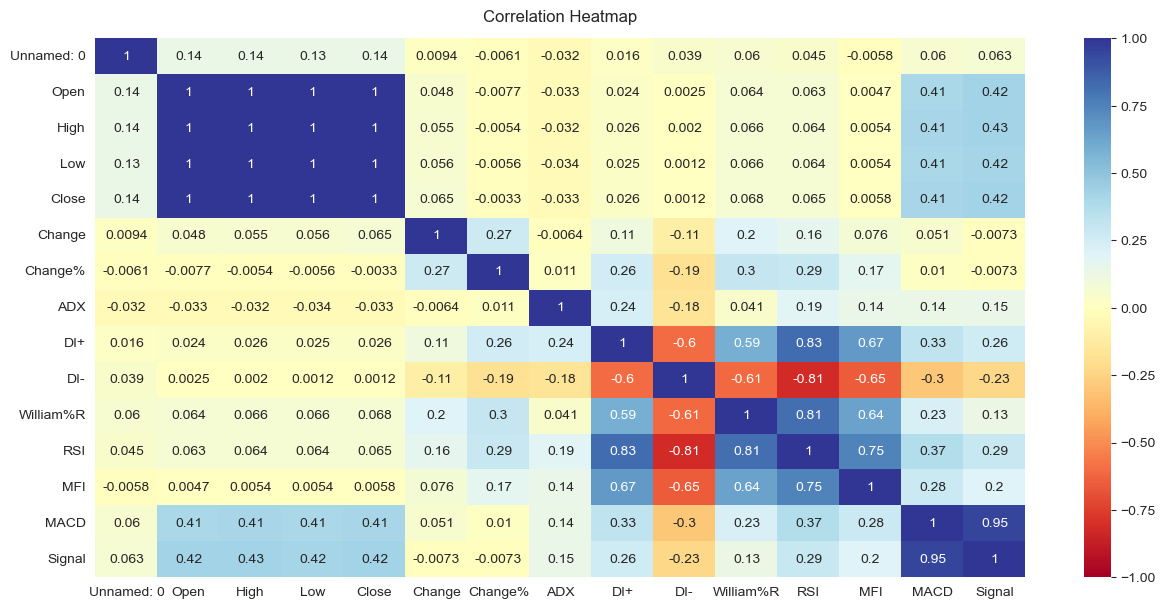

In [50]:
# now finding the correlation between features
custom_cmap = 'RdYlBu'
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(df_Numerical.corr(), vmin=-1, vmax=1, annot=True, cmap = custom_cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Scaling of Numerical features

In [51]:
# columns before Min Max Scaling
df_Numerical

,Unnamed: 0,Open,High,Low,Close,Change,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal,Recommendation
0,0,4.54,4.79,4.42,4.77,0.20,4.38,47.12,34.02,16.34,-70.09,47.82,38.94,-0.04,0.06,Hold
1,1,4.59,4.67,4.44,4.57,0.01,0.22,48.05,34.11,17.27,-88.70,43.87,33.14,-0.03,0.08,Hold
2,2,4.78,4.80,4.47,4.56,-0.19,-4.00,49.22,35.27,17.42,-93.08,43.67,23.22,0.00,0.11,Hold
3,3,4.68,4.90,4.59,4.75,0.04,0.85,50.40,36.95,16.52,-82.40,46.57,31.41,0.03,0.14,Hold
4,4,5.01,5.08,4.68,4.71,-0.39,-7.65,51.34,38.55,15.97,-85.60,45.87,29.68,0.06,0.17,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,41065,31.93,32.01,31.52,31.55,-0.28,-0.88,28.41,34.82,17.37,-37.39,60.32,64.44,0.68,0.68,Hold
41066,41066,32.04,32.38,31.68,31.83,-0.37,-1.15,28.02,36.44,16.66,-24.77,63.59,62.88,0.70,0.68,Sell
41067,41067,31.74,32.33,31.60,32.20,0.35,1.10,27.31,38.36,17.75,-5.99,68.11,63.17,0.69,0.67,Strong Buy
41068,41068,30.90,31.92,30.84,31.85,1.19,3.88,26.58,37.15,18.96,-3.98,65.99,55.86,0.63,0.67,Buy


In [52]:
scaling = MinMaxScaler()
# Get the list of numerical columns dynamically
numerical_columns = df_Numerical.select_dtypes(include=['int', 'float']).columns
# Iterate through each numerical column and scale it
for column in numerical_columns:
    df_Numerical[column] = scaling.fit_transform(df_Numerical[[column]])
df_Numerical

,Unnamed: 0,Open,High,Low,Close,Change,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal,Recommendation
0,0.000000,0.001159,0.001217,0.001150,0.001225,0.445002,0.161399,0.606695,0.351880,0.249627,0.2991,0.444283,0.3894,0.303233,0.270684,Hold
1,0.000024,0.001173,0.001185,0.001155,0.001171,0.444552,0.152453,0.620592,0.352864,0.265062,0.1130,0.400045,0.3314,0.303276,0.270789,Hold
2,0.000049,0.001223,0.001219,0.001163,0.001169,0.444079,0.143379,0.638075,0.365544,0.267552,0.0692,0.397805,0.2322,0.303404,0.270946,Hold
3,0.000073,0.001197,0.001246,0.001196,0.001219,0.444623,0.153808,0.655708,0.383909,0.252614,0.1760,0.430283,0.3141,0.303532,0.271103,Hold
4,0.000097,0.001285,0.001293,0.001220,0.001209,0.443606,0.135531,0.669755,0.401399,0.243485,0.1440,0.422444,0.2968,0.303661,0.271260,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,0.999903,0.008475,0.008431,0.008481,0.008402,0.443866,0.150088,0.327107,0.360625,0.266722,0.6261,0.584276,0.6444,0.306316,0.273932,Hold
41066,0.999927,0.008505,0.008529,0.008524,0.008477,0.443653,0.149508,0.321279,0.378334,0.254938,0.7523,0.620898,0.6288,0.306401,0.273932,Sell
41067,0.999951,0.008425,0.008516,0.008502,0.008576,0.445356,0.154346,0.310669,0.399322,0.273029,0.9401,0.671520,0.6317,0.306358,0.273880,Strong Buy
41068,0.999976,0.008200,0.008407,0.008297,0.008483,0.447343,0.160323,0.299761,0.386095,0.293112,0.9602,0.647777,0.5586,0.306101,0.273880,Buy


# Categorical Data

# Name

In [53]:
name = df_Categorical["Name"].value_counts()
name

ICICI Bank Limited                 1006
Pacific Biosciences of Californ    1006
Organigram Holdings Inc.           1006
Owens & Minor                      1006
Alteryx                            1006
ArcBest Corporation                1006
Teladoc Health                     1006
Vaxart - Common Stock              1006
Novavax                            1006
Anaplan                            1006
Square                             1004
Vertex Pharmaceuticals Incorpor    1004
Infosys Limited                    1004
Twilio Inc.                        1004
Jabil Inc.                         1004
Fastly                             1000
BioCryst Pharmaceuticals           1000
Zscaler                             996
Moderna                             992
Tesla                               988
Ocugen                              986
GT Biopharma                        503
PayPal Holdings                     503
DocuSign                            503
Transcat                            503


<Axes: >

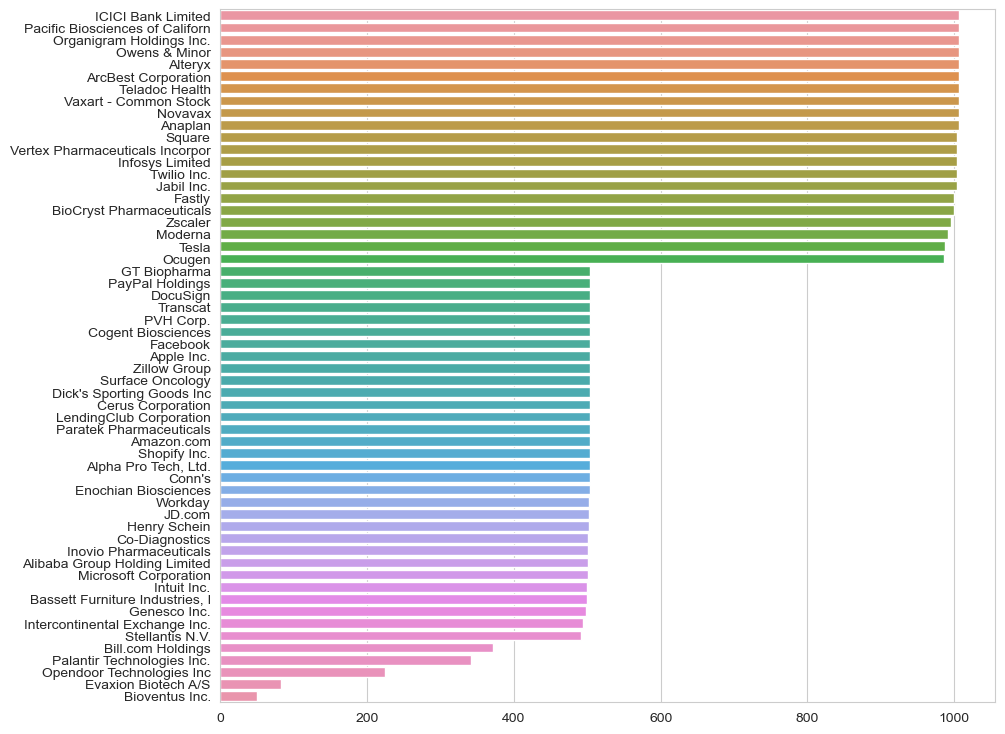

In [54]:
# now plotting the bar plot
plt.figure(figsize=(10,9)) 
sns.barplot(x = name.values, y = name.index, orient='h')

# Observations
From the graph we can tell that companies like ICICI, Pacific, Organigram, Owens, Alteryx, ArcBest, Teladoc, Vaxart, Novavax, Anaplan, Square, Vertex, Infosys, Twilio, Jabil, Fastly, BioCryst have number of stocks around 1000, whereas companies like GT, PayPal, DocuSign, Transcat, PVH, Cogent, Facebook, Apple, Zillow, Surface, Dick's, Cerus, LendingClub, Paratek, Amazon, Shopify, Alpha, Conn's, Enochian, Workday, JD.com, Henry, Co-Diagnostics, Inovio, Alibaba, Microsoft, Intuit, Bassett, Genesco, Intercontinental, Stellantis have number of stocks around 500 and very few companies have number of stocks below 400.

# Sector

In [55]:
sector = df_Categorical["Sector"].value_counts()
sector

Healthcare                14673
Technology                10745
Consumer Cyclical          5491
Financial Services         2506
Industrials                2012
Communication Services     2010
Real Estate                 224
Name: Sector, dtype: int64

<Axes: >

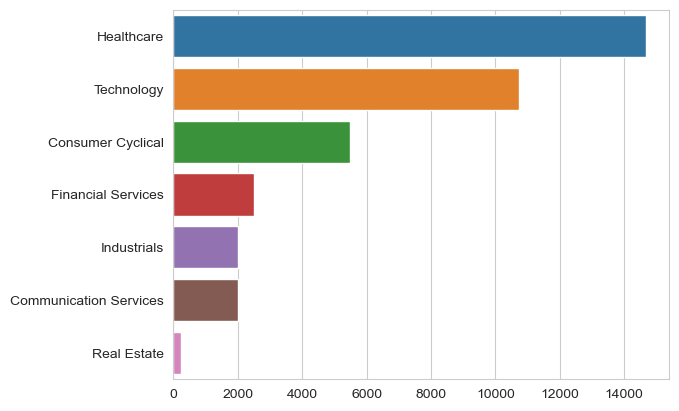

In [56]:
# now barplot
sns.barplot(x = sector.values, y = sector.index)

# Observations
Here the maximum number of stocks are from Healthcare Industry followed by Technology sector, Consumer Cyclical sector, Financial Services sector, Industrial sector, Communication Services sector, and lastly Real Estate sector.

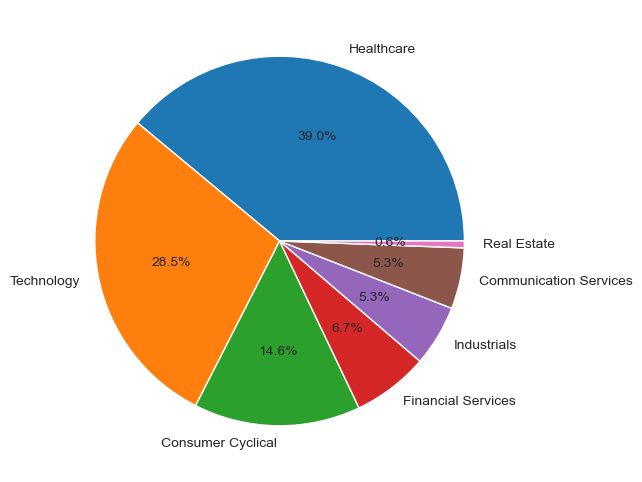

In [57]:
# piechart
sizes = sector.values
labels = sector.index
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

# Observations
Here we can see that Healthcare sector has the largest share of 39%, where as Real Estate has the minimum share of 0.6%.

In [58]:
industry = df_Categorical["Industry"].value_counts()
industry

Biotechnology                             9596
Software—Application                      4385
Software—Infrastructure                   3849
Internet Content & Information            2010
Diagnostics & Research                    1557
Medical Distribution                      1508
Internet Retail                           1506
Auto Manufacturers                        1479
Credit Services                           1006
Drug Manufacturers—Specialty & Generic    1006
Specialty Retail                          1006
Trucking                                  1006
Health Information Services               1006
Banks—Regional                            1006
Electronic Components                     1004
Information Technology Services           1004
Building Products & Equipment              503
Consumer Electronics                       503
Apparel Manufacturing                      503
Industrial Distribution                    503
Furnishings, Fixtures & Appliances         499
Apparel Retai

<Axes: >

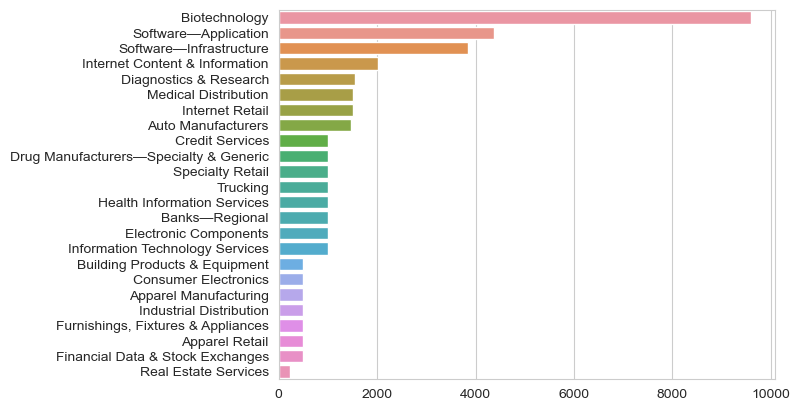

In [59]:
# now barplot
sns.barplot(x = industry.values , y = industry.index)

# Observations
Here we can see that industries related to Biotechnology have the highest numbers of stocks, which is around 10000. And rest of the industries have number of stocks below 5000.

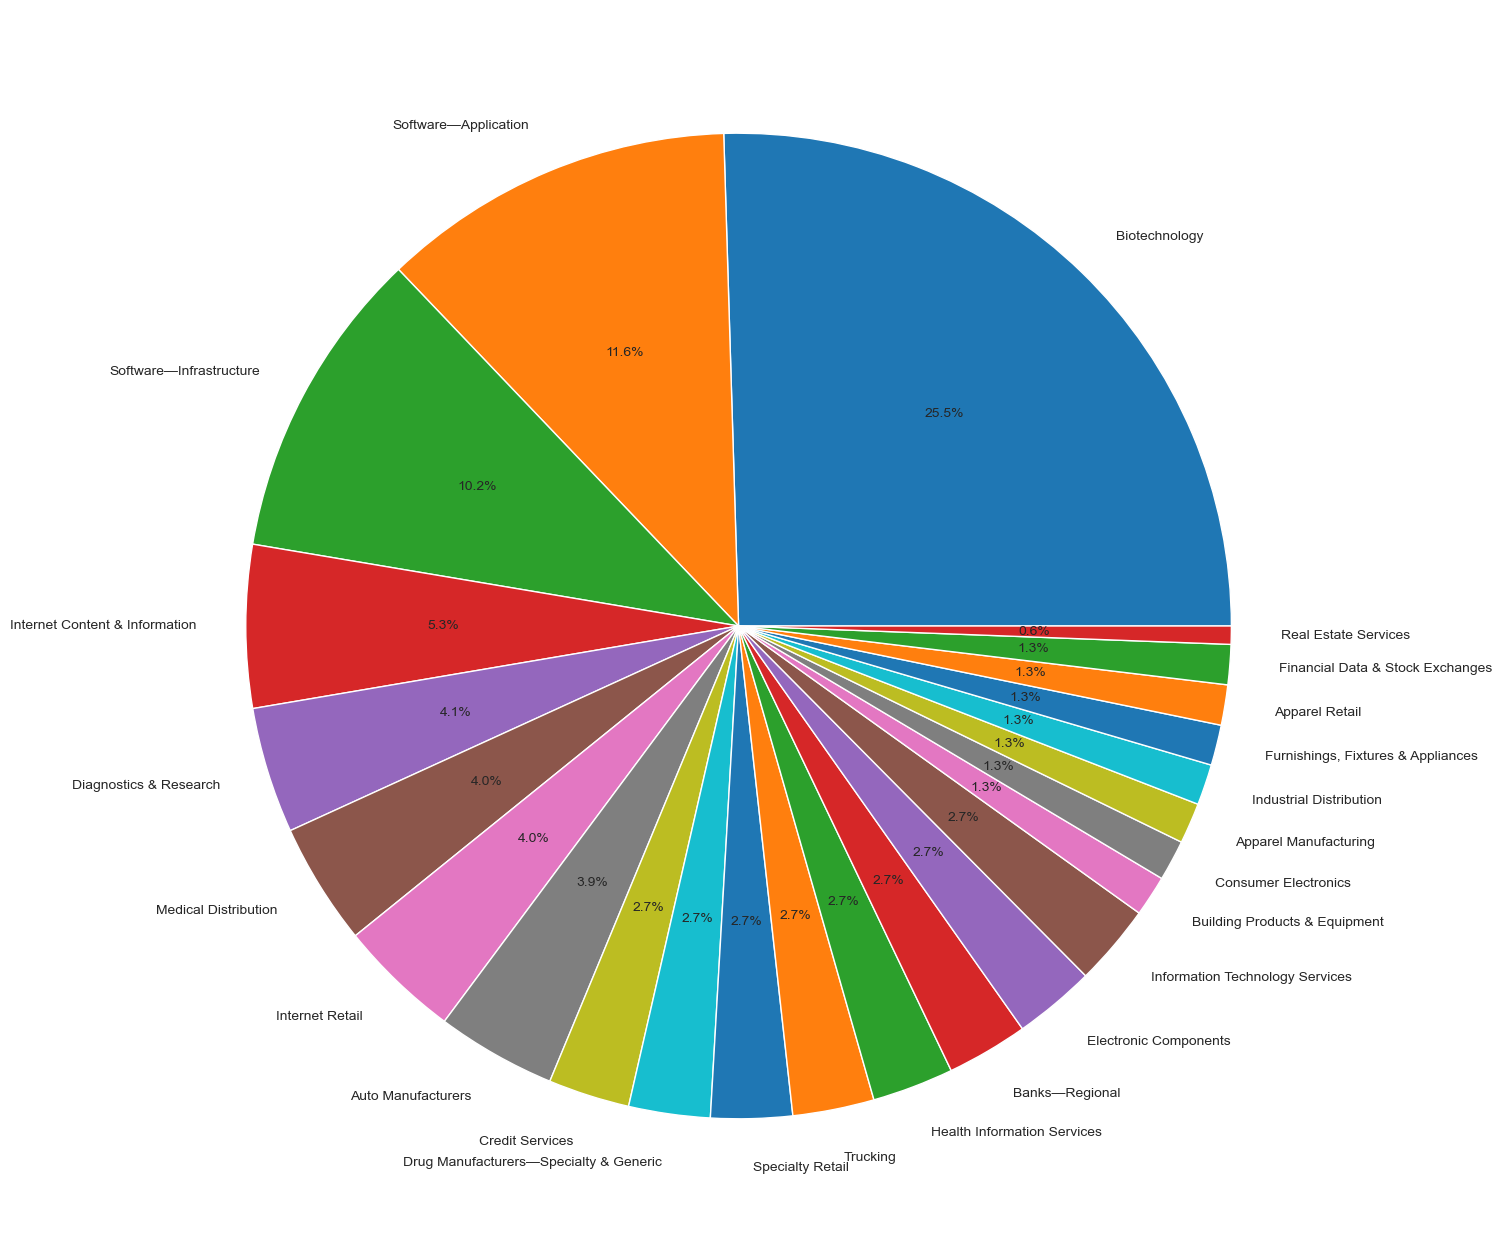

In [60]:
# now piechart
sizes = industry.values
labels = industry.index
plt.figure(figsize = (16, 16))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

# Observations
Here we can see that Biotechnology has the highest share of 25.5%, followed by share of Software-Application of 11.6%, Software-Infrastructure has 10.2%, rest all have share less than 10% respectively.

In [61]:
# Combining the Categorical and Numerical Columns together and forming a dataframe

In [62]:
df_Categorical1 = df_Categorical.drop("Recommendation", axis = 1)
df_Categorical1

,Date,Stock,MarketType,ADX_Strength,Region,Exchange,Name,Sector,Industry,Marketcap,InstitutionalHolders
0,"Jul 19,2021",ENOB,UpTrend,13days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
1,"Jul 16,2021",ENOB,UpTrend,12days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
2,"Jul 15,2021",ENOB,UpTrend,11days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
3,"Jul 14,2021",ENOB,UpTrend,10days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
4,"Jul 13,2021",ENOB,UpTrend,9days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
...,...,...,...,...,...,...,...,...,...,...,...
41065,"Jul 26,2019",JD,UpTrend,4days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41066,"Jul 25,2019",JD,UpTrend,3days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41067,"Jul 24,2019",JD,UpTrend,2days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41068,"Jul 23,2019",JD,UpTrend,1days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."


In [63]:
df_Concat = pd.concat([df_Categorical1,df_Numerical], axis = 1)
df_Concat

,Date,Stock,MarketType,ADX_Strength,Region,Exchange,Name,Sector,Industry,Marketcap,...,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal,Recommendation
0,"Jul 19,2021",ENOB,UpTrend,13days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,...,0.161399,0.606695,0.351880,0.249627,0.2991,0.444283,0.3894,0.303233,0.270684,Hold
1,"Jul 16,2021",ENOB,UpTrend,12days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,...,0.152453,0.620592,0.352864,0.265062,0.1130,0.400045,0.3314,0.303276,0.270789,Hold
2,"Jul 15,2021",ENOB,UpTrend,11days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,...,0.143379,0.638075,0.365544,0.267552,0.0692,0.397805,0.2322,0.303404,0.270946,Hold
3,"Jul 14,2021",ENOB,UpTrend,10days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,...,0.153808,0.655708,0.383909,0.252614,0.1760,0.430283,0.3141,0.303532,0.271103,Hold
4,"Jul 13,2021",ENOB,UpTrend,9days descend,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,...,0.135531,0.669755,0.401399,0.243485,0.1440,0.422444,0.2968,0.303661,0.271260,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,"Jul 26,2019",JD,UpTrend,4days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,...,0.150088,0.327107,0.360625,0.266722,0.6261,0.584276,0.6444,0.306316,0.273932,Hold
41066,"Jul 25,2019",JD,UpTrend,3days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,...,0.149508,0.321279,0.378334,0.254938,0.7523,0.620898,0.6288,0.306401,0.273932,Sell
41067,"Jul 24,2019",JD,UpTrend,2days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,...,0.154346,0.310669,0.399322,0.273029,0.9401,0.671520,0.6317,0.306358,0.273880,Strong Buy
41068,"Jul 23,2019",JD,UpTrend,1days ascend,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,...,0.160323,0.299761,0.386095,0.293112,0.9602,0.647777,0.5586,0.306101,0.273880,Buy


In [64]:
# now forming the x = independent variables/features and y = class lables/dependent variables
y = df_Concat["Recommendation"]

In [65]:
x = df_Concat.iloc[:,0:26]
x.columns

Index(['Date', 'Stock', 'MarketType', 'ADX_Strength', 'Region', 'Exchange',
       'Name', 'Sector', 'Industry', 'Marketcap', 'InstitutionalHolders',
       'Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Change', 'Change%',
       'ADX', 'DI+', 'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal'],
      dtype='object')

In [66]:
x.drop(["Date","Stock","MarketType","ADX_Strength","Region","Exchange","Name","Sector","Industry","Marketcap","InstitutionalHolders","Unnamed: 0"],axis = 1, inplace = True)
x

,Open,High,Low,Close,Change,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal
0,0.001159,0.001217,0.001150,0.001225,0.445002,0.161399,0.606695,0.351880,0.249627,0.2991,0.444283,0.3894,0.303233,0.270684
1,0.001173,0.001185,0.001155,0.001171,0.444552,0.152453,0.620592,0.352864,0.265062,0.1130,0.400045,0.3314,0.303276,0.270789
2,0.001223,0.001219,0.001163,0.001169,0.444079,0.143379,0.638075,0.365544,0.267552,0.0692,0.397805,0.2322,0.303404,0.270946
3,0.001197,0.001246,0.001196,0.001219,0.444623,0.153808,0.655708,0.383909,0.252614,0.1760,0.430283,0.3141,0.303532,0.271103
4,0.001285,0.001293,0.001220,0.001209,0.443606,0.135531,0.669755,0.401399,0.243485,0.1440,0.422444,0.2968,0.303661,0.271260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,0.008475,0.008431,0.008481,0.008402,0.443866,0.150088,0.327107,0.360625,0.266722,0.6261,0.584276,0.6444,0.306316,0.273932
41066,0.008505,0.008529,0.008524,0.008477,0.443653,0.149508,0.321279,0.378334,0.254938,0.7523,0.620898,0.6288,0.306401,0.273932
41067,0.008425,0.008516,0.008502,0.008576,0.445356,0.154346,0.310669,0.399322,0.273029,0.9401,0.671520,0.6317,0.306358,0.273880
41068,0.008200,0.008407,0.008297,0.008483,0.447343,0.160323,0.299761,0.386095,0.293112,0.9602,0.647777,0.5586,0.306101,0.273880


# Spliting the Data

In [67]:
xtrain, xtest, ytrain, ytest =  train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
print(xtrain.shape)
print(ytrain.shape)

(30128, 14)
(30128,)


In [69]:
print(xtest.shape)
print(ytest.shape)

(7533, 14)
(7533,)


In [70]:
ytrain.value_counts()

Hold           23779
Sell            2712
Buy             1787
Strong Sell     1044
Strong Buy       806
Name: Recommendation, dtype: int64

In [71]:
# here we can see that the data is imbalanced, because hold has the highest number of values.

# Modelling

In [72]:
final_Data_Train = {}
final_Data_Test = {}

In [73]:
[logistic_Train = {}
logistic_Test = {}]

# Logistic Regression

In [74]:
# parameters for tunning
tunning_parameters = [{"C":[10**-4,10**-2,10**0,10**2,10**4]}]
# Create GridSearchCV object
LogisticRegression_model = GridSearchCV(LogisticRegression(max_iter=400), tunning_parameters)
# training of model
LogisticRegression_model.fit(xtrain,ytrain)
# Print the best estimator found by GridSearchCV
print(LogisticRegression_model.best_estimator_)
# Evaluate the model on the train set
print(LogisticRegression_model.score(xtrain,ytrain))
# Evaluate the model on the test set
print(LogisticRegression_model.score(xtest,ytest))

LogisticRegression(C=0.0001, max_iter=400)
0.7892657992565055
0.7956989247311828


In [75]:
# predictions
# training Predictions
LogisticRegression_Train_Prediction = LogisticRegression_model.predict(xtrain)
# testing Predictions
LogisticRegression_Test_Prediction = LogisticRegression_model.predict(xtest)

In [76]:
#evaluation of Logistic Regression
x_LogisticRegression_Train_F1_Score = f1_score(ytrain, LogisticRegression_Train_Prediction, average = "weighted")
print("Training F1_Score is: ", x_LogisticRegression_Train_F1_Score)
logistic_Train["F1_Score"] = round(x_LogisticRegression_Train_F1_Score,4)

x_LogisticRegression_Test_F1_Score = f1_score(ytest, LogisticRegression_Test_Prediction, average = "weighted")
print("Testing F1_Score is: ", x_LogisticRegression_Test_F1_Score)
logistic_Test["F1_Score"] = round(x_LogisticRegression_Test_F1_Score,4)

Training F1_Score is:  0.6963085106023502
Testing F1_Score is:  0.705170304552186


In [77]:
# Finding the Precsion Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Precision_Score = precision_score(ytrain, LogisticRegression_Train_Prediction, average = "weighted")
print("The Training Precision Score is: ", x_LogisticRegression_Train_Precision_Score)
logistic_Train["Precision"] = round(x_LogisticRegression_Train_Precision_Score,4)
# Testing Data
x_LogisticRegression_Test_Precision_Score = precision_score(ytest, LogisticRegression_Test_Prediction, average = "weighted")
print("The Testing Precision Score is: ", x_LogisticRegression_Test_Precision_Score)
logistic_Test["Precision"] = round(x_LogisticRegression_Test_Precision_Score,4)

The Training Precision Score is:  0.6229405018760106
The Testing Precision Score is:  0.6331367788183605


In [78]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Recall_Score = recall_score(ytrain, LogisticRegression_Train_Prediction, average = "weighted")
print("The Training Recall Score is: ", x_LogisticRegression_Train_Recall_Score)
logistic_Train["Recall"] = round(x_LogisticRegression_Train_Recall_Score,4)

# Testing Data
x_LogisticRegression_Test_Recall_Score = recall_score(ytest, LogisticRegression_Test_Prediction, average = "weighted")
print("The Testing Recall Score is: ", x_LogisticRegression_Test_Recall_Score)
logistic_Test["Recall"] = round(x_LogisticRegression_Test_Recall_Score,4)

The Training Recall Score is:  0.7892657992565055
The Testing Recall Score is:  0.7956989247311828


In [79]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Accuracy_Score = accuracy_score(ytrain, LogisticRegression_Train_Prediction)
print("The Training Accuracy Score is: ", x_LogisticRegression_Train_Accuracy_Score)
logistic_Train["Accuracy"] = round(x_LogisticRegression_Train_Accuracy_Score,4)

# Testing Data
x_LogisticRegression_Test_Accuracy_Score = accuracy_score(ytest, LogisticRegression_Test_Prediction)
print("The Testing Accuracy Score is: ", x_LogisticRegression_Test_Accuracy_Score)
logistic_Test["Accuracy"] = round(x_LogisticRegression_Test_Accuracy_Score,4)

The Training Accuracy Score is:  0.7892657992565055
The Testing Accuracy Score is:  0.7956989247311828


In [80]:
print("Train Scores")
print(logistic_Train)
print("Test Score")
print(logistic_Test)

final_Data_Train["Logistic"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Logistic"].update(logistic_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Logistic"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Logistic"].update(logistic_Test)
print("final_Data_Test")
print(final_Data_Test)


Train Scores
{'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}
Test Score
{'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}
final_Data_Train {'Logistic': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}}
final_Data_Test {'Logistic': {}}
final_Data_Test
{'Logistic': {'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}}


In [81]:
Logistic_with_SMOT_Train = {}
Logistic_with_SMOT_Test = {}

# Logistic Regression with SMOT Technique

In [82]:
from imblearn.over_sampling import SMOTE
# applying the smote to balance the class 
smote = SMOTE(random_state=42)
xtrain_Smote, ytrain_Smote = smote.fit_resample(xtrain,ytrain)

# parameters for tunning
tunning_parameters = [{"C":[10**-6,10**-4,10**-2,10**0,10**2,10**4,10**6]}]
# Create GridSearchCV object
LogisticRegression_model_Smote = GridSearchCV(LogisticRegression(max_iter=400), tunning_parameters)
# training the model
LogisticRegression_model_Smote.fit(xtrain_Smote,ytrain_Smote)
# Print the best estimator found by GridSearchCV
print(LogisticRegression_model_Smote.best_estimator_)
# Evaluate the model on the train set
print(LogisticRegression_model_Smote.score(xtrain_Smote,ytrain_Smote))
# Evaluate the model on the test set
print(LogisticRegression_model_Smote.score(xtest,ytest))

LogisticRegression(C=10000, max_iter=400)
0.5240254005635224
0.22540820390282756


In [83]:
# predictions
# training Predictions
LogisticRegression_Train_Prediction_Smote = LogisticRegression_model.predict(xtrain_Smote)
# testing Predictions
LogisticRegression_Test_Prediction_Smote = LogisticRegression_model.predict(xtest)

In [84]:
#evaluation of Logistic Regression
x_LogisticRegression_SMOT_Train_F1_Score = f1_score(ytrain_Smote, LogisticRegression_Train_Prediction_Smote, average = "weighted")
print("Training F1_Score is: ", x_LogisticRegression_SMOT_Train_F1_Score)
Logistic_with_SMOT_Train["F1_Score"] = round(x_LogisticRegression_SMOT_Train_F1_Score,4)

x_LogisticRegression_SMOT_Test_F1_Score = f1_score(ytest, LogisticRegression_Test_Prediction_Smote, average = "weighted")
print("Testing F1_Score is: ", x_LogisticRegression_SMOT_Test_F1_Score)
Logistic_with_SMOT_Test["F1_Score"] = round(x_LogisticRegression_SMOT_Test_F1_Score,4)

Training F1_Score is:  0.06666666666666667
Testing F1_Score is:  0.705170304552186


In [85]:
# Finding the Precsion Score for Training and Testing Data
# Training Data
x_LogisticRegression_SMOT_Train_Precision_Score = precision_score(ytrain_Smote, LogisticRegression_Train_Prediction_Smote, average = "weighted")
print("The Precision Score is: ", x_LogisticRegression_SMOT_Train_Precision_Score)
Logistic_with_SMOT_Train["Precision"] = round(x_LogisticRegression_SMOT_Train_Precision_Score, 4)

# Testing Data
x_LogisticRegression_SMOT_Test_Precision_Score = precision_score(ytest, LogisticRegression_Test_Prediction_Smote, average = "weighted")
print("The Precision Score is: ", x_LogisticRegression_SMOT_Test_Precision_Score)
Logistic_with_SMOT_Test["Precision"] = round(x_LogisticRegression_SMOT_Test_Precision_Score, 4) 

The Precision Score is:  0.04
The Precision Score is:  0.6331367788183605


In [86]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_LogisticRegression_SMOT_Train_Recall_Score = recall_score(ytrain_Smote, LogisticRegression_Train_Prediction_Smote, average = "weighted")
print("The Recall Score is: ", x_LogisticRegression_SMOT_Train_Recall_Score)
Logistic_with_SMOT_Train["Recall"] = round(x_LogisticRegression_SMOT_Train_Recall_Score, 4)

# Testing Data
x_LogisticRegression_SMOT_Test_Recall_Score = recall_score(ytest, LogisticRegression_Test_Prediction_Smote, average = "weighted")
print("The Recall Score is: ", x_LogisticRegression_SMOT_Test_Recall_Score)
Logistic_with_SMOT_Test["Recall"] = round(x_LogisticRegression_SMOT_Test_Recall_Score, 4)

The Recall Score is:  0.2
The Recall Score is:  0.7956989247311828


In [87]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_LogisticRegression_SMOT_Train_Accuracy_Score = accuracy_score(ytrain_Smote, LogisticRegression_Train_Prediction_Smote)
print("The Accuracy Score is: ", x_LogisticRegression_SMOT_Train_Accuracy_Score)
Logistic_with_SMOT_Train["Accuracy"] = round(x_LogisticRegression_SMOT_Train_Accuracy_Score, 4)

# Testing Data
x_LogisticRegression_SMOT_Test_Accuracy_Score = accuracy_score(ytest, LogisticRegression_Test_Prediction_Smote)
print("The Accuracy Score is: ", x_LogisticRegression_SMOT_Test_Accuracy_Score)
Logistic_with_SMOT_Test["Accuracy"] = round(x_LogisticRegression_SMOT_Test_Accuracy_Score, 4)

The Accuracy Score is:  0.2
The Accuracy Score is:  0.7956989247311828


In [88]:
print("Train Scores")
print(Logistic_with_SMOT_Train)
print("Test Score")
print(Logistic_with_SMOT_Test)
print("-----------------------------------------------------------")
final_Data_Train["Logistic_SMOT"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Logistic_SMOT"].update(Logistic_with_SMOT_Train)
print("final_Data_Train")
print(final_Data_Train)
print("-----------------------------------------------------------")
final_Data_Test["Logistic_SMOT"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Logistic_SMOT"].update(Logistic_with_SMOT_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}
Test Score
{'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}
-----------------------------------------------------------
final_Data_Train {'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}}
-----------------------------------------------------------
final_Data_Test {'Logistic': {'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}, 'Logistic_SMOT': {}}
final_Data_Test
{'Logistic': {'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}, 'Logistic_SMOT': {'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}}


In [89]:
# Here we wont be using smot technique, as it wont work for this particular application

# Decision Tree

In [90]:
Decision_Tree_Train = {}
Decision_Tree_Test = {}

In [91]:
# Define tuning parameters for the Decision Tree classifier
tree_tunning_parameter = [{"max_depth" : [4,5,6]}]
# Create a Decision Tree classifier with specified parameters
Decision_Tree_Classifier = tree.DecisionTreeClassifier(min_samples_split = 5, random_state = 42,class_weight='balanced')
# Create a GridSearchCV object with the Decision Tree classifier and tuning parameters
DecisionTree_Classifier = GridSearchCV(Decision_Tree_Classifier, tree_tunning_parameter)
# Train the model on the training data
DecisionTree_Classifier.fit(xtrain,ytrain)
# Print the best estimator found by GridSearchCV
print(DecisionTree_Classifier.best_estimator_)
# Evaluete the model on train set
print(DecisionTree_Classifier.score(xtrain,ytrain))
# Evalute the model on test set
print(DecisionTree_Classifier.score(xtest,ytest))

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=5, random_state=42)
0.5154673393520978
0.5117483074472322


In [92]:
# predictions
# training predictions
Decision_Tree_Classifier_Train_Predicition = DecisionTree_Classifier.predict(xtrain)
# testing predictions
Decision_Tree_Classifier_Test_Predicition = DecisionTree_Classifier.predict(xtest)

In [93]:
#evaluation of Decision Tree
x_Decision_Tree_Classifier_Train_F1_Score = f1_score(ytrain, Decision_Tree_Classifier_Train_Predicition, average = "weighted")
print("Training F1_Score is: ", x_Decision_Tree_Classifier_Train_F1_Score)
Decision_Tree_Train["F1_Score"] = round(x_Decision_Tree_Classifier_Train_F1_Score,4)

x_Decision_Tree_Classifier_Test_F1_Score = f1_score(ytest, Decision_Tree_Classifier_Test_Predicition, average = "weighted")
print("Testing F1_Score is: ", x_Decision_Tree_Classifier_Test_F1_Score)
Decision_Tree_Test["F1_Score"] = round(x_Decision_Tree_Classifier_Test_F1_Score,4)

Training F1_Score is:  0.5748381959787482
Testing F1_Score is:  0.5743384778498596


In [94]:
# Finding the Precision Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Precision_Score = precision_score(ytrain, Decision_Tree_Classifier_Train_Predicition, average = "weighted")
print("Training Precision Score is: ", x_Decision_Tree_Classifier_Train_Precision_Score)
Decision_Tree_Train["Precision"] = round(x_Decision_Tree_Classifier_Train_Precision_Score, 4)

# Testing Data
x_Decision_Tree_Classifier_Test_Precision_Score = precision_score(ytest, Decision_Tree_Classifier_Test_Predicition, average = "weighted")
print("Testing Precision Score is: ", x_Decision_Tree_Classifier_Test_Precision_Score)
Decision_Tree_Test["Precision"] = round(x_Decision_Tree_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.8253903411354959
Testing Precision Score is:  0.8266699720867118


In [146]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Recall_Score = recall_score(ytrain, Decision_Tree_Classifier_Train_Predicition, average = "weighted")
print("Training Recall Score is: ", x_Decision_Tree_Classifier_Train_Recall_Score)
Decision_Tree_Train["Recall"] = round(x_Decision_Tree_Classifier_Train_Recall_Score, 4)

# Testing Data
x_Decision_Tree_Classifier_Test_Recall_Score = recall_score(ytest, Decision_Tree_Classifier_Test_Predicition, average = "weighted")
print("Testing Recall Score is: ", x_Decision_Tree_Classifier_Test_Recall_Score)
Decision_Tree_Test["Recall"] = round(x_Decision_Tree_Classifier_Test_Recall_Score, 4)

Training Recall Score is:  0.5154673393520978
Testing Recall Score is:  0.5117483074472322


In [148]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, Decision_Tree_Classifier_Train_Predicition)
print("Training Accuracy Score is: ", x_Decision_Tree_Classifier_Train_Accuracy_Score)
Decision_Tree_Train["Accuracy"] = round(x_Decision_Tree_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_Decision_Tree_Classifier_Test_Accuracy_Score = accuracy_score(ytest, Decision_Tree_Classifier_Test_Predicition)
print("Testing Accuracy Score is: ", x_Decision_Tree_Classifier_Test_Accuracy_Score)
Decision_Tree_Test["Accuracy"] = round(x_Decision_Tree_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.5154673393520978
Testing Accuracy Score is:  0.5117483074472322


In [149]:
print("Train Scores")
print(Decision_Tree_Train)
print("Test Score")
print(Decision_Tree_Test)

final_Data_Train["Decision Tree"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Decision Tree"].update(Decision_Tree_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Decision Tree"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Decision Tree"].update(Decision_Tree_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155, 'Accuracy': 0.5155}
Test Score
{'F1_Score': 0.5743, 'Precision': 0.8267, 'Recall': 0.5117, 'Accuracy': 0.5117}
final_Data_Train {'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}, 'KNN': {'F1_Score': 0.82, 'Precision': 0.8175, 'Recall': 0.8175, 'Accuracy': 0.8175}, 'SVM': {'F1_Score': 0.8803, 'Precision': 0.8973, 'Recall': 0.8934, 'Accuracy': 0.8934}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155, 'Accuracy': 0.5155}, 'Random Forst': {'F1_Score

# Random Forest

In [98]:
Random_Forest_Train = {}
Random_Forest_Test = {}

In [99]:
# Define tuning parameters for the Random forest classifier
forest_tunning_paramter = [{"max_depth" : [4,5,6], "n_estimators" : [200,300,400,500]}]
# Creating the Random forest classifiers with specified parameters(only class weights)
Random_Forest_Classifier = RandomForestClassifier(random_state = 42, class_weight = "balanced")
# Create a GridSearchCV object with Random Forest Classifier and tunning parameters
# Here we are not using verbose = 2, which is for detailed output(like logs)
# here n_jobs = -1 is to enable the parallel processing
RF_Classifier = GridSearchCV(estimator = Random_Forest_Classifier, param_grid = forest_tunning_paramter, cv = 3, n_jobs = -1)
# Train the model with the training data
RF_Classifier.fit(xtrain,ytrain)
# Print the Best Estimator found by GridSearchCV
print(RF_Classifier.best_estimator_)
# Evaluate the model on Trian set
print(RF_Classifier.score(xtrain,ytrain))
# Evaluate the model on Test set
print(RF_Classifier.score(xtest,ytest))

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=400,
                       random_state=42)
0.46385422198619225
0.45187840169919025


In [100]:
# Creating the Random forest classifiers with specified parameters
Random_Forest_Classifier = RandomForestClassifier(random_state = 42, class_weight = "balanced", criterion = "entropy", 
                                                  n_estimators = 200, max_features = "auto", max_depth = 6)
# Training the Random Forest
RF_Classifier_TP = Random_Forest_Classifier.fit(xtrain,ytrain)
# Evaluate the model on Trian set
print(RF_Classifier_TP.score(xtrain,ytrain))
# Evaluate the model on Test set
print(RF_Classifier_TP.score(xtest,ytest))

0.4627588953797132
0.4520111509358821


In [101]:
# predictions
# training predictions
RF_Classifier_TP_Train_Predicition = RF_Classifier_TP.predict(xtrain)
# testing predictions
RF_Classifier_TP_Test_Predicition = RF_Classifier_TP.predict(xtest)

In [102]:
#evaluation of Random Forest
x_Random_Forest_Classifier_Train_F1_Score = f1_score(ytrain, RF_Classifier_TP_Train_Predicition, average='weighted')
print("Training F1_Score is: ", x_Random_Forest_Classifier_Train_F1_Score)
Random_Forest_Train["F1_Score"] = round(x_Random_Forest_Classifier_Train_F1_Score, 4)

x_Random_Forest_Classifier_Test_F1_Score = f1_score(ytest, RF_Classifier_TP_Test_Predicition, average='weighted')
print("Testing F1_Score is: ", x_Random_Forest_Classifier_Train_F1_Score)
Random_Forest_Test["F1_Score"] = round(x_Random_Forest_Classifier_Test_F1_Score, 4)

Training F1_Score is:  0.5083046599450428
Testing F1_Score is:  0.5083046599450428


In [103]:
# Finding the Precision Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Precision_Score = precision_score(ytrain, RF_Classifier_TP_Train_Predicition, average='weighted')
print("Training Precision Score is: ", x_Random_Forest_Classifier_Train_Precision_Score)
Random_Forest_Train["Precision"] = round(x_Random_Forest_Classifier_Train_Precision_Score, 4)

# Testing Data
x_Random_Forest_Classifier_Test_Precision_Score = f1_score(ytest, RF_Classifier_TP_Test_Predicition, average='weighted')
print("Testing Precision Score is: ", x_Random_Forest_Classifier_Test_Precision_Score)
Random_Forest_Test["Precision"] = round(x_Random_Forest_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.8320119638035036
Testing Precision Score is:  0.5019204881212761


In [104]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Recall_Score = recall_score(ytrain, RF_Classifier_TP_Train_Predicition, average='weighted')
print("Training Recall Score is: ", x_Random_Forest_Classifier_Train_Recall_Score)
Random_Forest_Train["Recall"] = round(x_Random_Forest_Classifier_Train_Precision_Score, 4)

# Testing Data
x_Random_Forest_Classifier_Test_Recall_Score = recall_score(ytest, RF_Classifier_TP_Test_Predicition, average='weighted')
print("Training Recall Score is: ", x_Random_Forest_Classifier_Test_Recall_Score)
Random_Forest_Test["Recall"] = round(x_Random_Forest_Classifier_Test_Recall_Score, 4)

Training Recall Score is:  0.4627588953797132
Training Recall Score is:  0.4520111509358821


In [105]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, RF_Classifier_TP_Train_Predicition)
print("Training Accuracy Score is: ", x_Random_Forest_Classifier_Train_Accuracy_Score)
Random_Forest_Train["Accuracy"] = round(x_Random_Forest_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_Random_Forest_Classifier_Test_Accuracy_Score = accuracy_score(ytest, RF_Classifier_TP_Test_Predicition)
print("Training Accuracy Score is: ", x_Random_Forest_Classifier_Test_Accuracy_Score)
Random_Forest_Test["Accuracy"] = round(x_Random_Forest_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.4627588953797132
Training Accuracy Score is:  0.4520111509358821


In [106]:
print("Train Scores")
print(Random_Forest_Train)
print("Test Score")
print(Random_Forest_Test)

final_Data_Train["Random Forst"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Random Forst"].update(Random_Forest_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Random Forst"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Random Forst"].update(Random_Forest_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}
Test Score
{'F1_Score': 0.5019, 'Precision': 0.5019, 'Recall': 0.452, 'Accuracy': 0.452}
final_Data_Train {'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}}
final_Data_Test {'Logistic': {'F1_Score': 0.7052, 'Precision': 0.6331, 'Recall': 0.7957, 'Accuracy': 0.7957}, 'Logistic_SMOT': {'F1_Score': 0.7052,

# KNN (K-Nearest Neighbour)

In [107]:
KNN_Train = {}
KNN_Test = {}

In [108]:
# defining the tunning parameters 
k_tunning_parameters = [{"n_neighbors" : [3,5,7,9]}]
# Creating the KNN classifiers
KNN_C = KNeighborsClassifier()
# Creating the GridSearhCV object
KNN_Classifier = GridSearchCV(KNN_C, k_tunning_parameters, scoring = "accuracy")
# train the model
KNN_Classifier.fit(xtrain,ytrain)
# Print the Best Estimator found by GridSearchCV
print(KNN_Classifier.best_estimator_)
# Evaluate the model on the training data
print(KNN_Classifier.score(xtrain,ytrain))
# Evaluate the model on the testing data
print(KNN_Classifier.score(xtest,ytest))

KNeighborsClassifier(n_neighbors=9)
0.8487453531598513
0.836054692685517


In [109]:
# predictions
# training predicitions
KNN_Classifier_Train_Predictions = KNN_Classifier.predict(xtrain)
# testing predicitions
KNN_Classifier_Test_Predictions = KNN_Classifier.predict(xtest)

In [110]:
# Evaluation
x_KNN_Classifier_Train_F1_Score = f1_score(ytrain, KNN_Classifier_Train_Predictions, average = "weighted")
print("The F1_Score is: ", x_KNN_Classifier_Train_F1_Score)
KNN_Train["F1_Score"] = round(x_KNN_Classifier_Train_F1_Score, 4)

x_KNN_Classifier_Test_F1_Score = f1_score(ytest, KNN_Classifier_Test_Predictions, average = "weighted")
print("The F1_Score is: ", x_KNN_Classifier_Test_F1_Score)
KNN_Test["F1_Score"] = round(x_KNN_Classifier_Test_F1_Score, 4)

The F1_Score is:  0.8200057693874502
The F1_Score is:  0.8053925320981026


In [111]:
# Finding the Precision Score for Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Precision_Score = precision_score(ytrain, KNN_Classifier_Train_Predictions, average = "weighted")
print("The Precision Score is: ", x_KNN_Classifier_Train_Precision_Score)
KNN_Train["Precision"] = round(x_KNN_Classifier_Train_Precision_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Precision_Score = precision_score(ytest, KNN_Classifier_Test_Predictions, average = "weighted")
print("The Precision Score is: ", x_KNN_Classifier_Test_Precision_Score)
KNN_Train["Precision"] = round(x_KNN_Classifier_Test_Precision_Score, 4)

The Precision Score is:  0.844840891252575
The Precision Score is:  0.8174800971841542


In [112]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Recall_Score = recall_score(ytrain, KNN_Classifier_Train_Predictions, average = "weighted")
print("The Recall Score is: ", x_KNN_Classifier_Train_Precision_Score)
KNN_Train["Recall"] = round(x_KNN_Classifier_Train_Precision_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Recall_Score = recall_score(ytest, KNN_Classifier_Test_Predictions, average = "weighted")
print("The Recall Score is: ", x_KNN_Classifier_Test_Precision_Score)
KNN_Train["Recall"] = round(x_KNN_Classifier_Test_Precision_Score, 4)

The Recall Score is:  0.844840891252575
The Recall Score is:  0.8174800971841542


In [113]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, KNN_Classifier_Train_Predictions)
print("The Accuracy Score is: ", x_KNN_Classifier_Train_Accuracy_Score)
KNN_Train["Accuracy"] = round(x_KNN_Classifier_Train_Precision_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Accuracy_Score = accuracy_score(ytest, KNN_Classifier_Test_Predictions)
print("The Accuracy Score is: ", x_KNN_Classifier_Train_Accuracy_Score)
KNN_Train["Accuracy"] = round(x_KNN_Classifier_Test_Precision_Score, 4)

The Accuracy Score is:  0.8487453531598513
The Accuracy Score is:  0.8487453531598513


In [114]:
print("Train Scores")
print(KNN_Train)
print("Test Score")
print(KNN_Test)

final_Data_Train["KNN"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["KNN"].update(KNN_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["KNN"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["KNN"].update(KNN_Train)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.82, 'Precision': 0.8175, 'Recall': 0.8175, 'Accuracy': 0.8175}
Test Score
{'F1_Score': 0.8054}
final_Data_Train {'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}, 'KNN': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}, 'KNN': {'F1_Score': 0.82, 'Precision': 0.8175, 'Recall': 0.8175, 'Accuracy': 0.8175}}
final_Data_Test {'Logistic': {'F

# SVM (Support vector Machine)

In [115]:
SVM_Train = {}
SVM_Test = {}

In [116]:
# defining the tunning parameters
svm_tunning_Parameter = [{"C" : [0.1, 1, 10, 100], "gamma" : [0.01, 0.1, 1, 10]}]
# creating the SVM Classifier
SVM_C = SVC()
# creating the GridSearchCV object
SVM_Classifier = GridSearchCV(SVM_C, svm_tunning_Parameter, scoring = "accuracy")
# trainin the model
SVM_Classifier.fit(xtrain,ytrain)
# Print the Best Estimator found by GridSearchCV
print(SVM_Classifier.best_estimator_)
# Evaluate the model on training data
print(SVM_Classifier.score(xtrain,ytrain))
# Evaluate the model on testing Data
print(SVM_Classifier.score(xtest,ytest))

SVC(C=100, gamma=10)
0.8933882103027084
0.8647285278109651


In [124]:
# prediction
# training prediction
SVM_Classifier_Train_Predictions = SVM_Classifier.predict(xtrain)
# testing prediction
SVM_Classifier_Test_Predictions = SVM_Classifier.predict(xtest)

In [125]:
# Evaluation
x_SVM_Classifier_Train_F1_Score = f1_score(ytrain, SVM_Classifier_Train_Predictions, average = "weighted")
print("The F1_Score is: ", x_SVM_Classifier_Train_F1_Score)
SVM_Train["F1_Score"] = round(x_SVM_Classifier_Train_F1_Score, 4)

x_SVM_Classifier_Test_F1_Score = f1_score(ytest, SVM_Classifier_Test_Predictions, average = "weighted")
print("The F1_Score is: ", x_SVM_Classifier_Test_F1_Score)
SVM_Test["F1_Score"] = round(x_SVM_Classifier_Test_F1_Score, 4)

The F1_Score is:  0.880310439915266
The F1_Score is:  0.8474332788724382


In [130]:
# Finding the Precision Score for Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Precision_Score = precision_score(ytrain, SVM_Classifier_Train_Predictions, average = "weighted")
print("The Precision Score is: ", x_SVM_Classifier_Train_Precision_Score)
SVM_Train["Precision"] = round(x_SVM_Classifier_Train_Precision_Score, 4)

# Testing Data
x_SVM_Classifier_Test_Precision_Score = precision_score(ytest, SVM_Classifier_Test_Predictions, average = "weighted")
print("The Precision Score is: ", x_KNN_Classifier_Test_Precision_Score)
SVM_Test["Precision"] = round(x_SVM_Classifier_Test_Precision_Score, 4)

The Precision Score is:  0.8973144226256141
The Precision Score is:  0.8174800971841542


In [131]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Recall_Score = recall_score(ytrain, SVM_Classifier_Train_Predictions, average = "weighted")
print("The Recall Score is: ", x_SVM_Classifier_Train_Recall_Score)
SVM_Train["Recall"] = round(x_SVM_Classifier_Train_Recall_Score, 4)

# Testing Data
x_SVM_Classifier_Test_Recall_Score = recall_score(ytest, SVM_Classifier_Test_Predictions, average = "weighted")
print("The Recall Score is: ", x_SVM_Classifier_Test_Recall_Score)
SVM_Test["Recall"] = round(x_SVM_Classifier_Test_Recall_Score, 4)

The Recall Score is:  0.8933882103027084
The Recall Score is:  0.8647285278109651


In [132]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, SVM_Classifier_Train_Predictions)
print("The Accuracy Score is: ", x_SVM_Classifier_Train_Accuracy_Score)
SVM_Train["Accuracy"] = round(x_SVM_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_SVM_Classifier_Test_Accuracy_Score = accuracy_score(ytest, SVM_Classifier_Test_Predictions)
print("The Accuracy Score is: ", x_SVM_Classifier_Test_Accuracy_Score)
SVM_Test["Accuracy"] = round(x_SVM_Classifier_Test_Accuracy_Score, 4)

The Accuracy Score is:  0.8933882103027084
The Accuracy Score is:  0.8647285278109651


In [133]:
print("Train Scores")
print(SVM_Train)
print("Test Score")
print(SVM_Test)

final_Data_Train["SVM"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["SVM"].update(SVM_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["SVM"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["SVM"].update(SVM_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.8803, 'Precision': 0.8973, 'Recall': 0.8934, 'Accuracy': 0.8934}
Test Score
{'F1_Score': 0.8474, 'Precision': 0.8559, 'Recall': 0.8647, 'Accuracy': 0.8647}
final_Data_Train {'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall': 0.832, 'Accuracy': 0.4628}, 'KNN': {'F1_Score': 0.82, 'Precision': 0.8175, 'Recall': 0.8175, 'Accuracy': 0.8175}, 'SVM': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.6963, 'Precision': 0.6229, 'Recall': 0.7893, 'Accuracy': 0.7893}, 'Logistic_SMOT': {'F1_Score': 0.0667, 'Precision': 0.04, 'Recall': 0.2, 'Accuracy': 0.2}, 'Decision Tree': {'F1_Score': 0.5748, 'Precision': 0.8254, 'Recall': 0.5155}, 'Random Forst': {'F1_Score': 0.5083, 'Precision': 0.832, 'Recall':

# Conclusion:

In [150]:
#Final Observations:
train_Table = PrettyTable()
train_Table.field_names = ["Algorithm", "F1_Score", "Precision", "Recall", "Accuracy"]
# iterating through dictionary
for algorithm, metrics in final_Data_Train.items():
    # Extract metrics
    f1_score = metrics.get("F1_Score", "-")
    precision = metrics.get("Precision", "-")
    recall = metrics.get("Recall", "-")
    accuracy = metrics.get("Accuracy", "-")
    # adding the rows to table
    train_Table.add_row([algorithm, f1_score, precision, recall, accuracy])
print(train_Table)

+---------------+----------+-----------+--------+----------+
|   Algorithm   | F1_Score | Precision | Recall | Accuracy |
+---------------+----------+-----------+--------+----------+
|    Logistic   |  0.6963  |   0.6229  | 0.7893 |  0.7893  |
| Logistic_SMOT |  0.0667  |    0.04   |  0.2   |   0.2    |
| Decision Tree |  0.5748  |   0.8254  | 0.5155 |  0.5155  |
|  Random Forst |  0.5083  |   0.832   | 0.832  |  0.4628  |
|      KNN      |   0.82   |   0.8175  | 0.8175 |  0.8175  |
|      SVM      |  0.8803  |   0.8973  | 0.8934 |  0.8934  |
+---------------+----------+-----------+--------+----------+


In [151]:
#Final Observations:
test_Table = PrettyTable()
test_Table.field_names = ["Algorithm", "F1_Score", "Precision", "Recall", "Accuracy"]
# iterating through dictionary
for algorithm, metrics in final_Data_Test.items():
    # Extract metrics
    f1_score = metrics.get("F1_Score", "-")
    precision = metrics.get("Precision", "-")
    recall = metrics.get("Recall", "-")
    accuracy = metrics.get("Accuracy", "-")
    # adding the rows to table
    test_Table.add_row([algorithm, f1_score, precision, recall, accuracy])
print(test_Table)

+---------------+----------+-----------+--------+----------+
|   Algorithm   | F1_Score | Precision | Recall | Accuracy |
+---------------+----------+-----------+--------+----------+
|    Logistic   |  0.7052  |   0.6331  | 0.7957 |  0.7957  |
| Logistic_SMOT |  0.7052  |   0.6331  | 0.7957 |  0.7957  |
| Decision Tree |  0.5743  |   0.8267  | 0.5117 |  0.5117  |
|  Random Forst |  0.5019  |   0.5019  | 0.452  |  0.452   |
|      KNN      |   0.82   |   0.8175  | 0.8175 |  0.8175  |
|      SVM      |  0.8474  |   0.8559  | 0.8647 |  0.8647  |
+---------------+----------+-----------+--------+----------+


# Observations
Based on the above results we can say that SVM Classifier gives us the highest accuracy, followed by KNN, Logistic Regression, Decision Tree and Random Forest.